<a href="https://colab.research.google.com/github/ArshiAbolghasemi/AI-UT/blob/main/machine_learning/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In this project we are going to predict boston area price using machine learning algorithms.

## Imports




In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, r2_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from scipy.stats import expon, randint

## EDA

EDA stands for Exploratory Data Analysis, which is the process of analyzing and summarizing data sets to understand their main characteristics. EDA is a preliminary step in data analysis that helps to identify patterns, relationships, and anomalies in the data before applying any statistical or machine learning techniques.

### Read Dataset

First, let's read our dataset file.

In [2]:
file_path = os.path.join(os.getcwd(), 'DataSet.xlsx')
boston_house = pd.read_excel(file_path)

### Summary

Now, we can use the shape attribute to check how large the resulting DataFrame is

In [ ]:
boston_house.shape

(506, 14)

We can examine the contents of the house DataFrame using the head() command, which grabs the first five rows:

In [ ]:
boston_house.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [ ]:
boston_house

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7     NaN   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

Now, let's generate high-level summary of the attributes in dataframe using
describe and info method

In [ ]:
boston_house.describe(include='all')

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

If you notice **RAD**, **CHAS** columns are categorical. let's describe this separately.

In [ ]:
boston_house['RAD'].astype('category').describe()

count     506
unique     10
top         5
freq      115
Name: RAD, dtype: int64

In [ ]:
boston_house['CHAS'].astype('category').describe()

count     480.0
unique      2.0
top         0.0
freq      396.0
Name: CHAS, dtype: float64

Now, let's use info to describe our dataset characteristic

In [ ]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### NaN Values

Now, let's count null values and their proportion

In [ ]:
nan_cols = boston_house.isnull()

In [ ]:
count_nan_per_column = nan_cols.sum()
count_nan_per_column

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [ ]:
proportion_nan_per_column = nan_cols.mean()
proportion_nan_per_column

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.051383
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.053360
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.039526
LSTAT      0.000000
MEDV       0.106719
dtype: float64

### Unique Values per Attribue

Now let's plot unqieu vlaues per attribute

Unique values per column:
 CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64


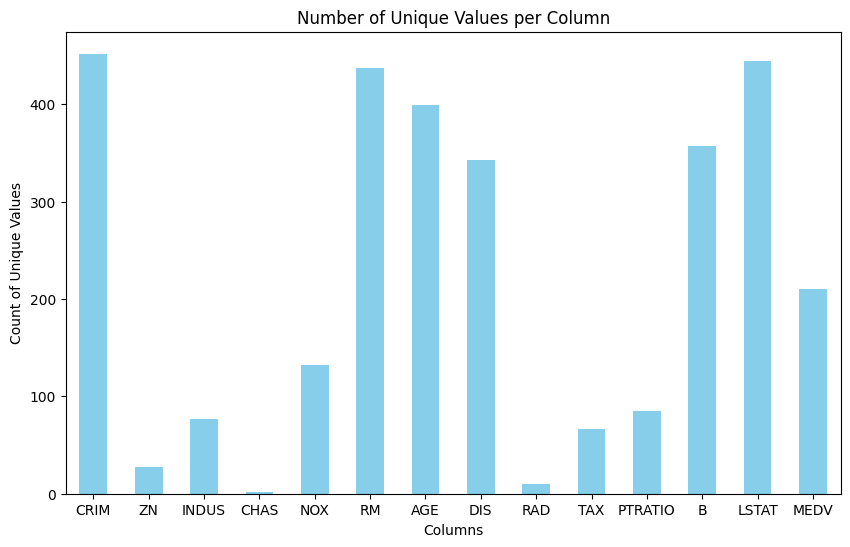

In [ ]:
unique_counts = boston_house.nunique()
print("Unique values per column:\n", unique_counts)
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=0)
plt.show()

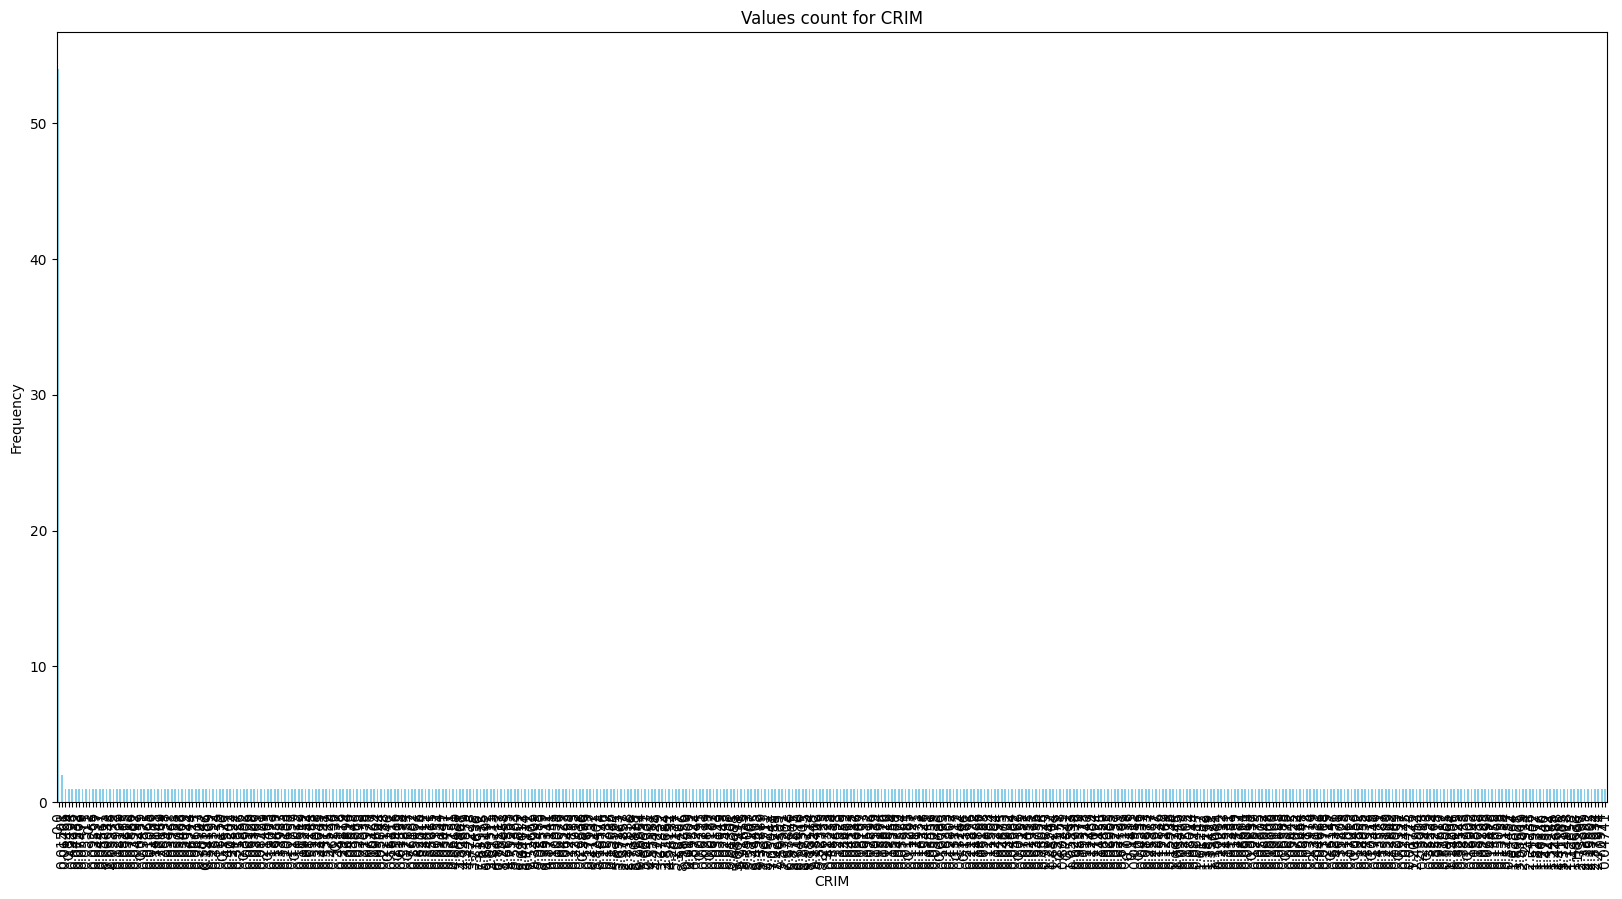

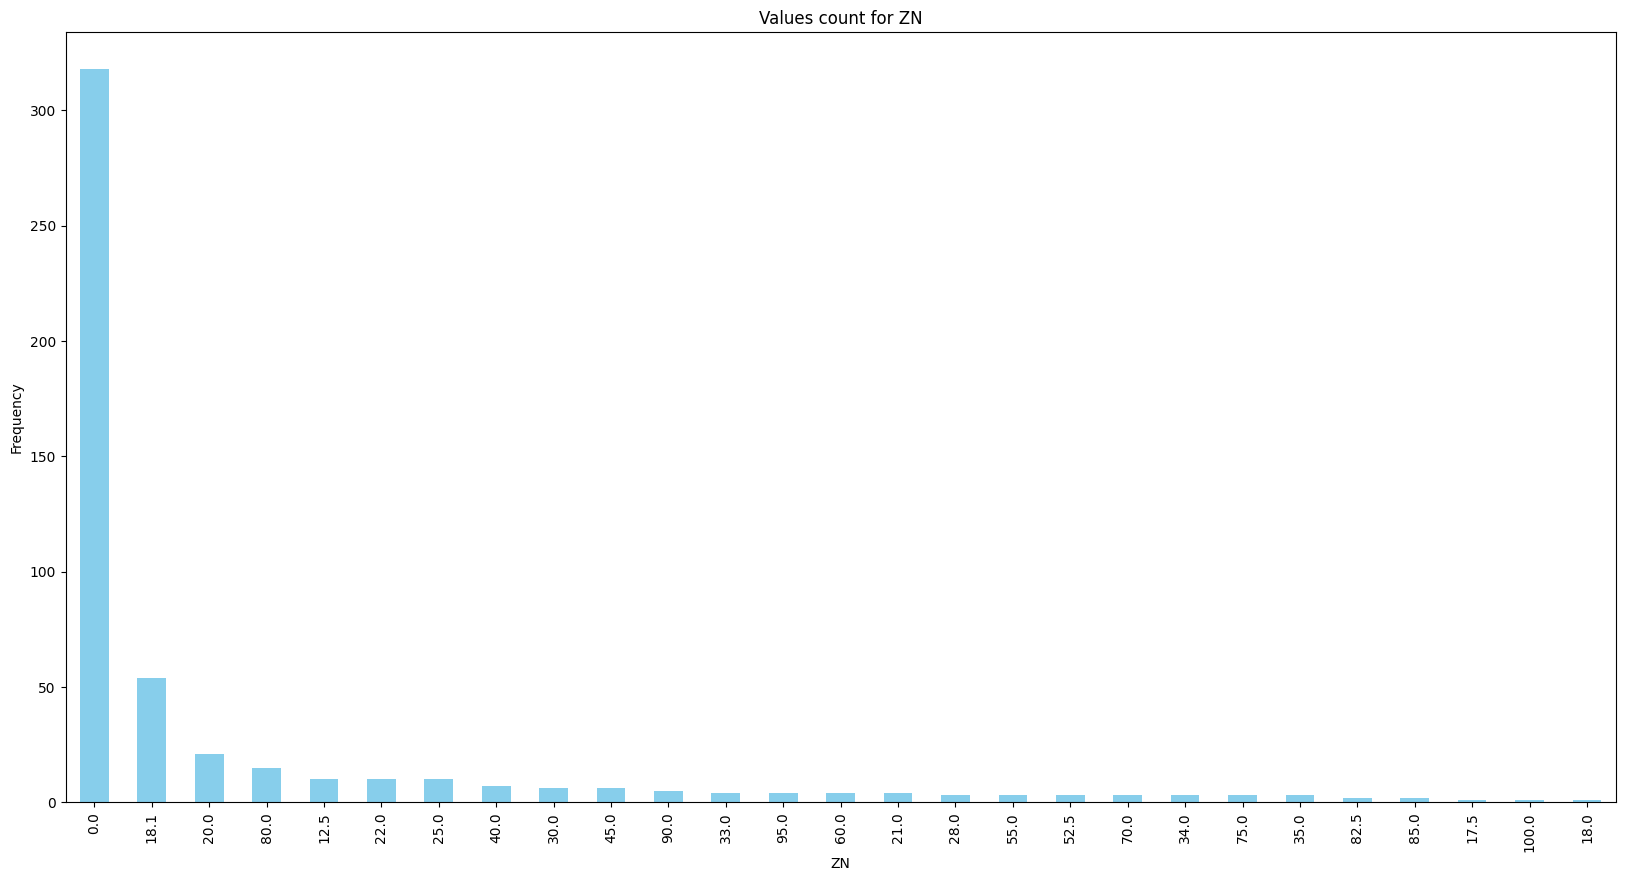

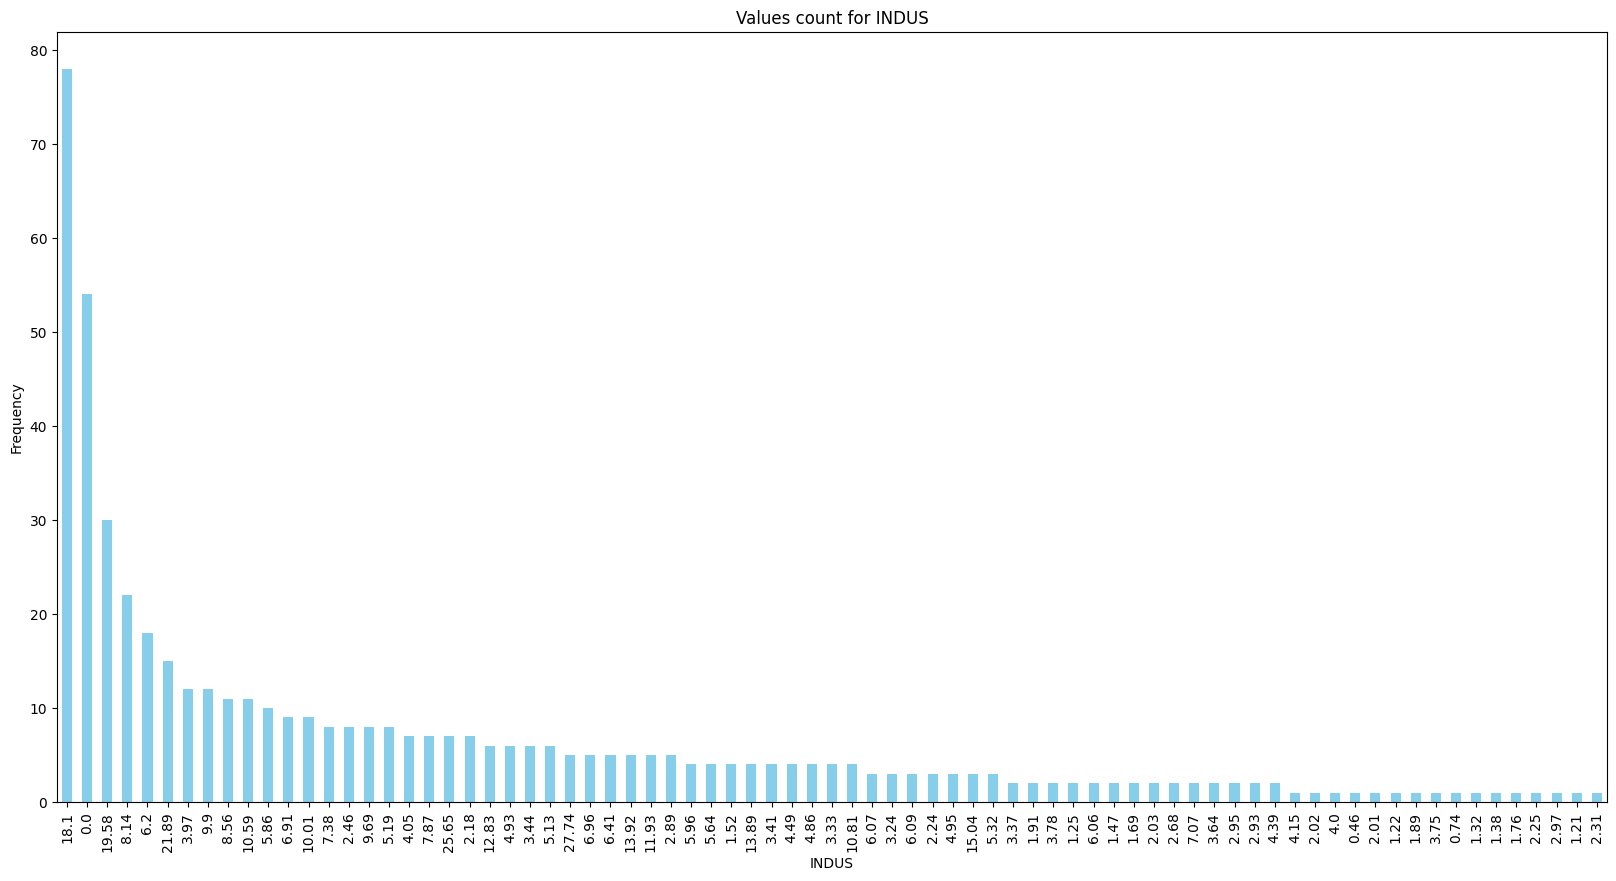

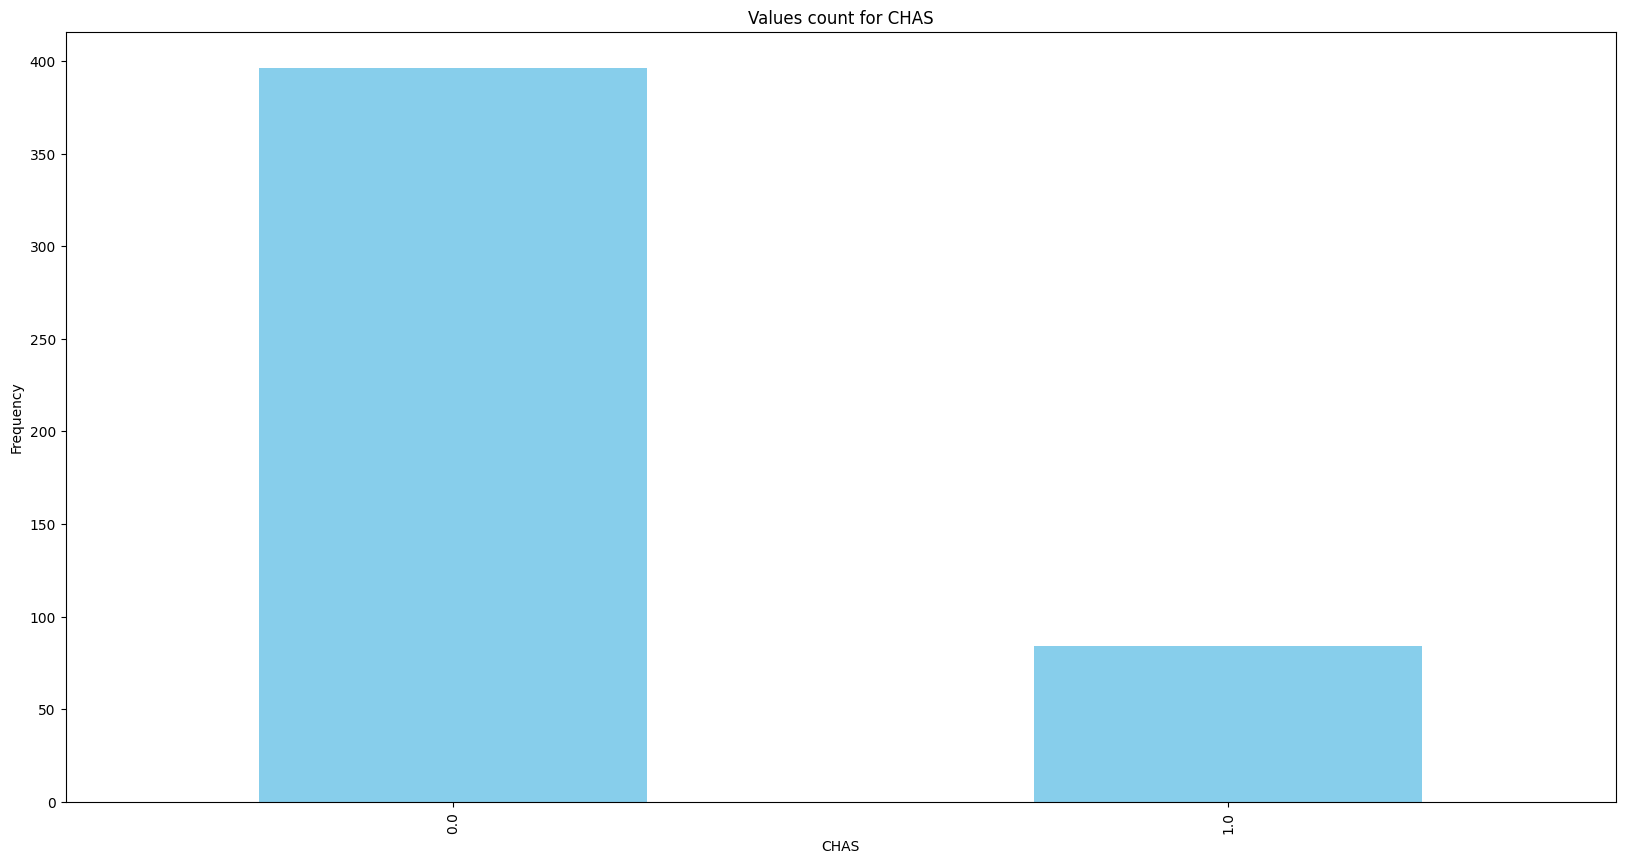

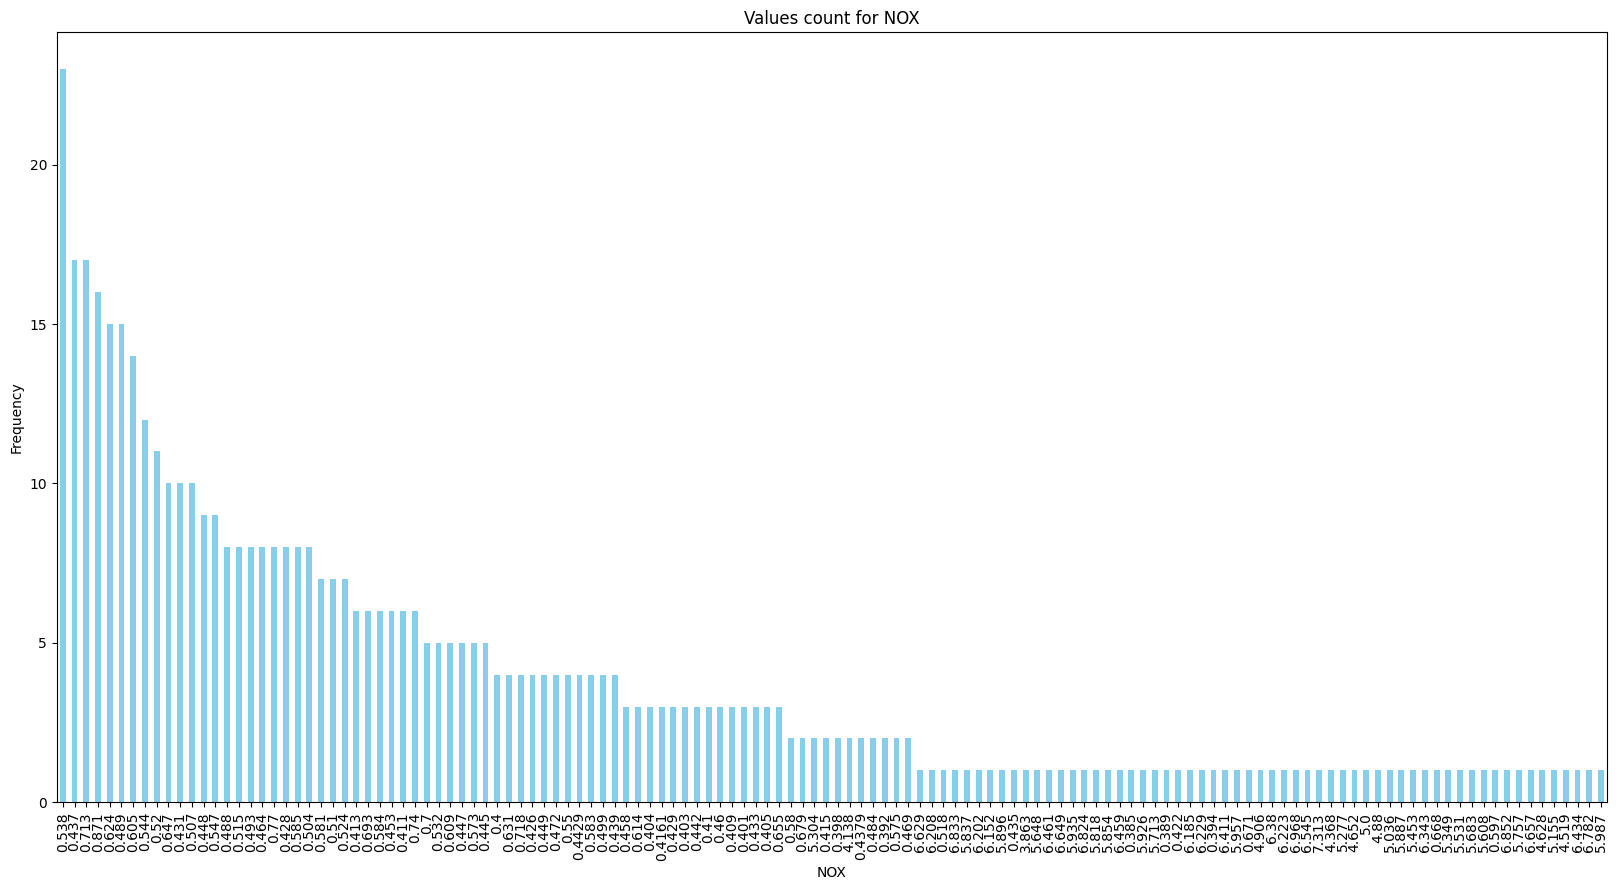

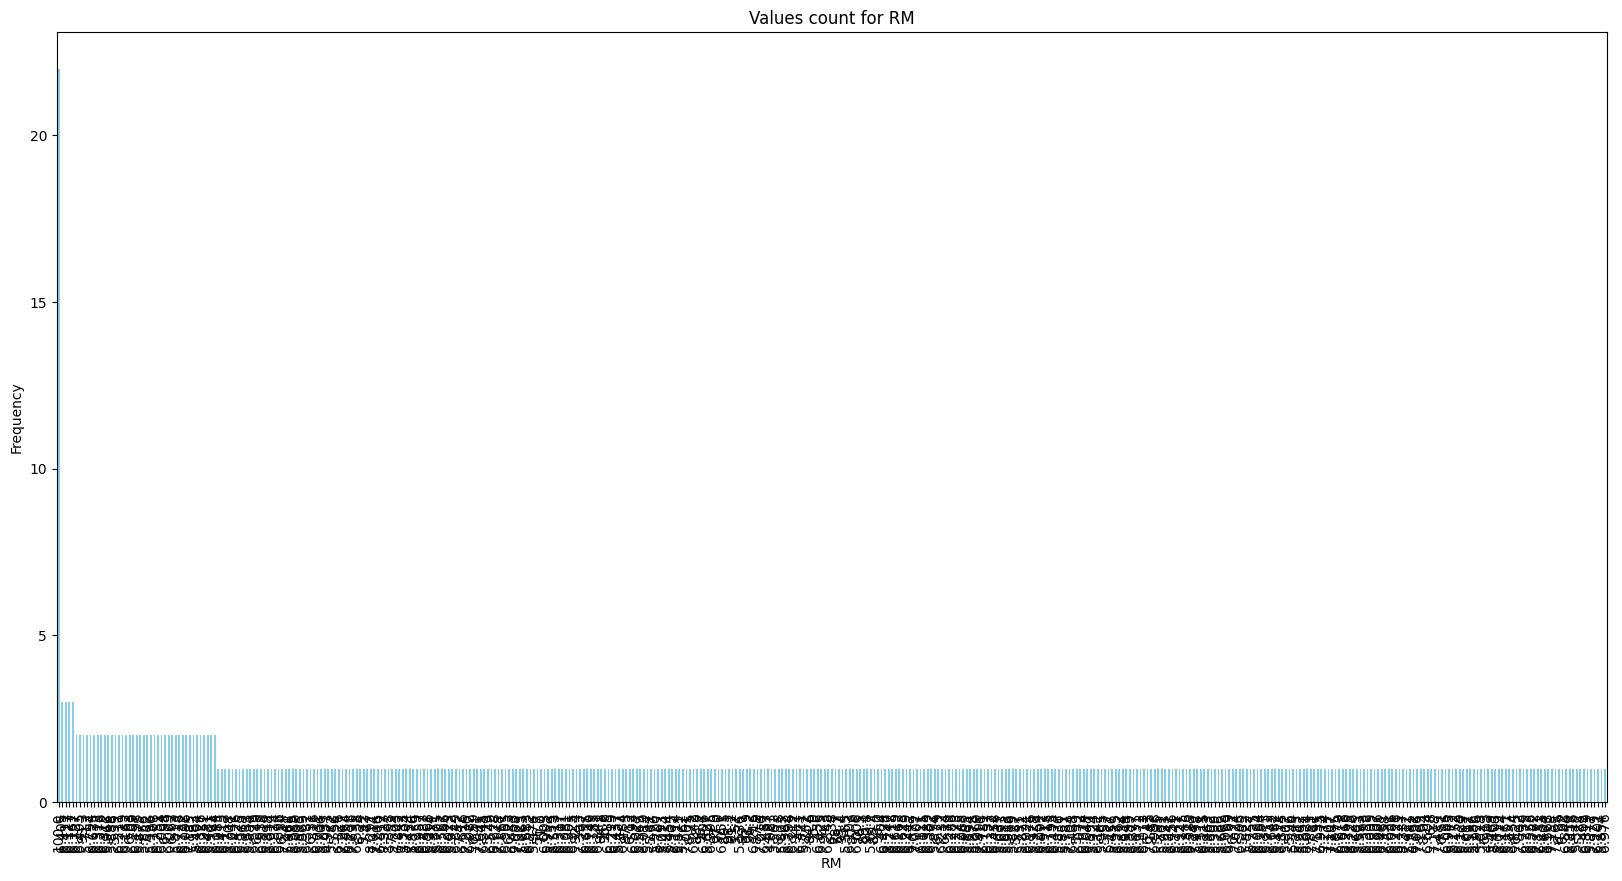

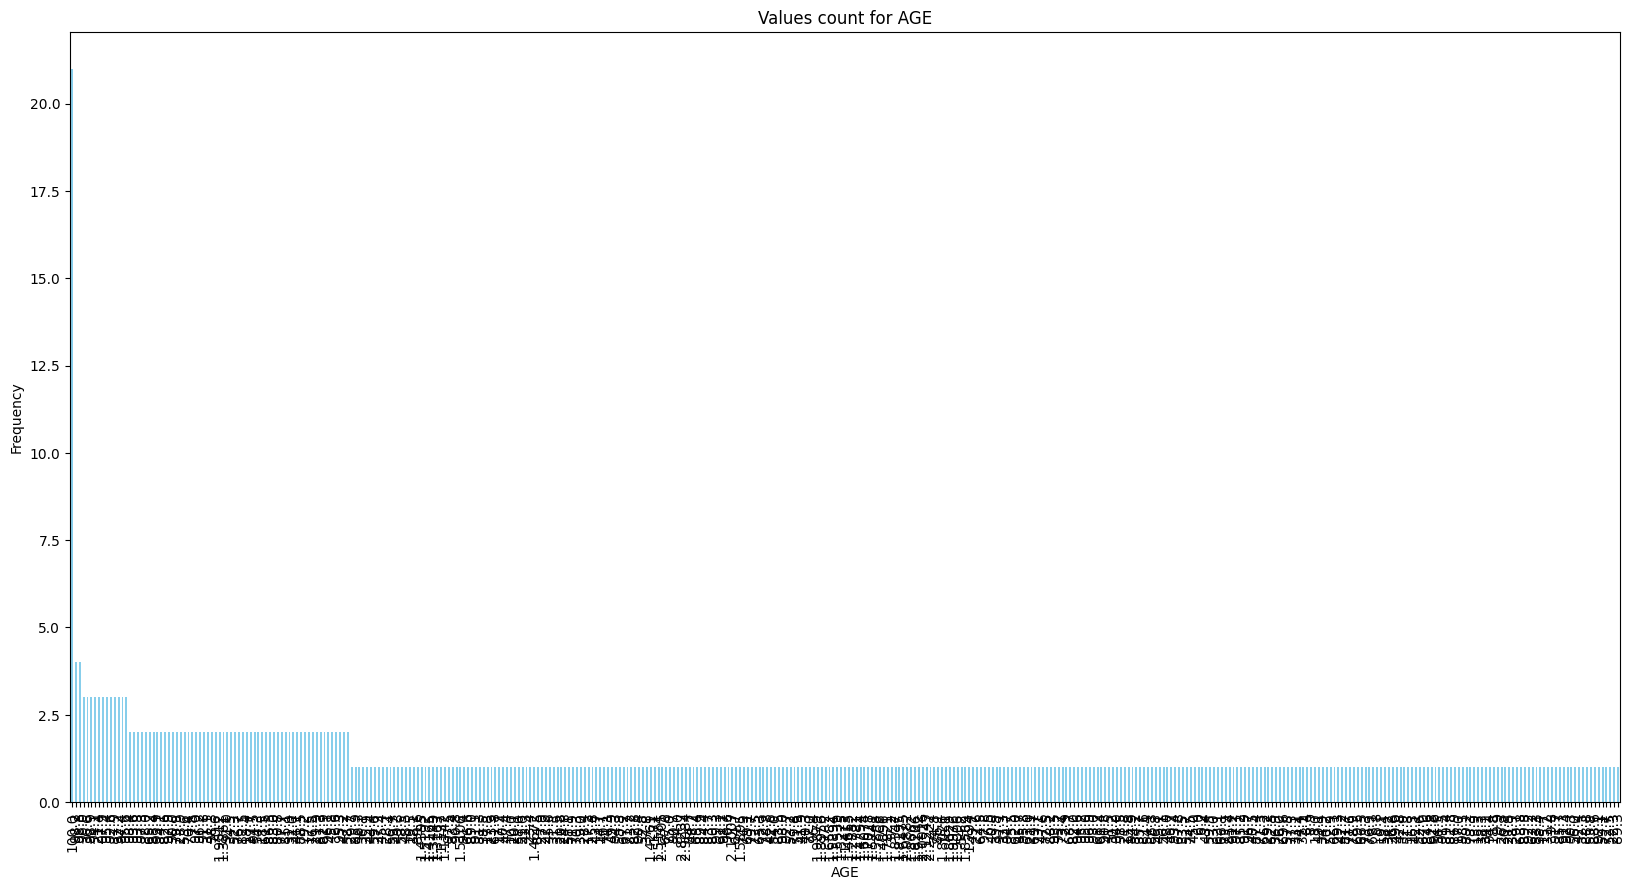

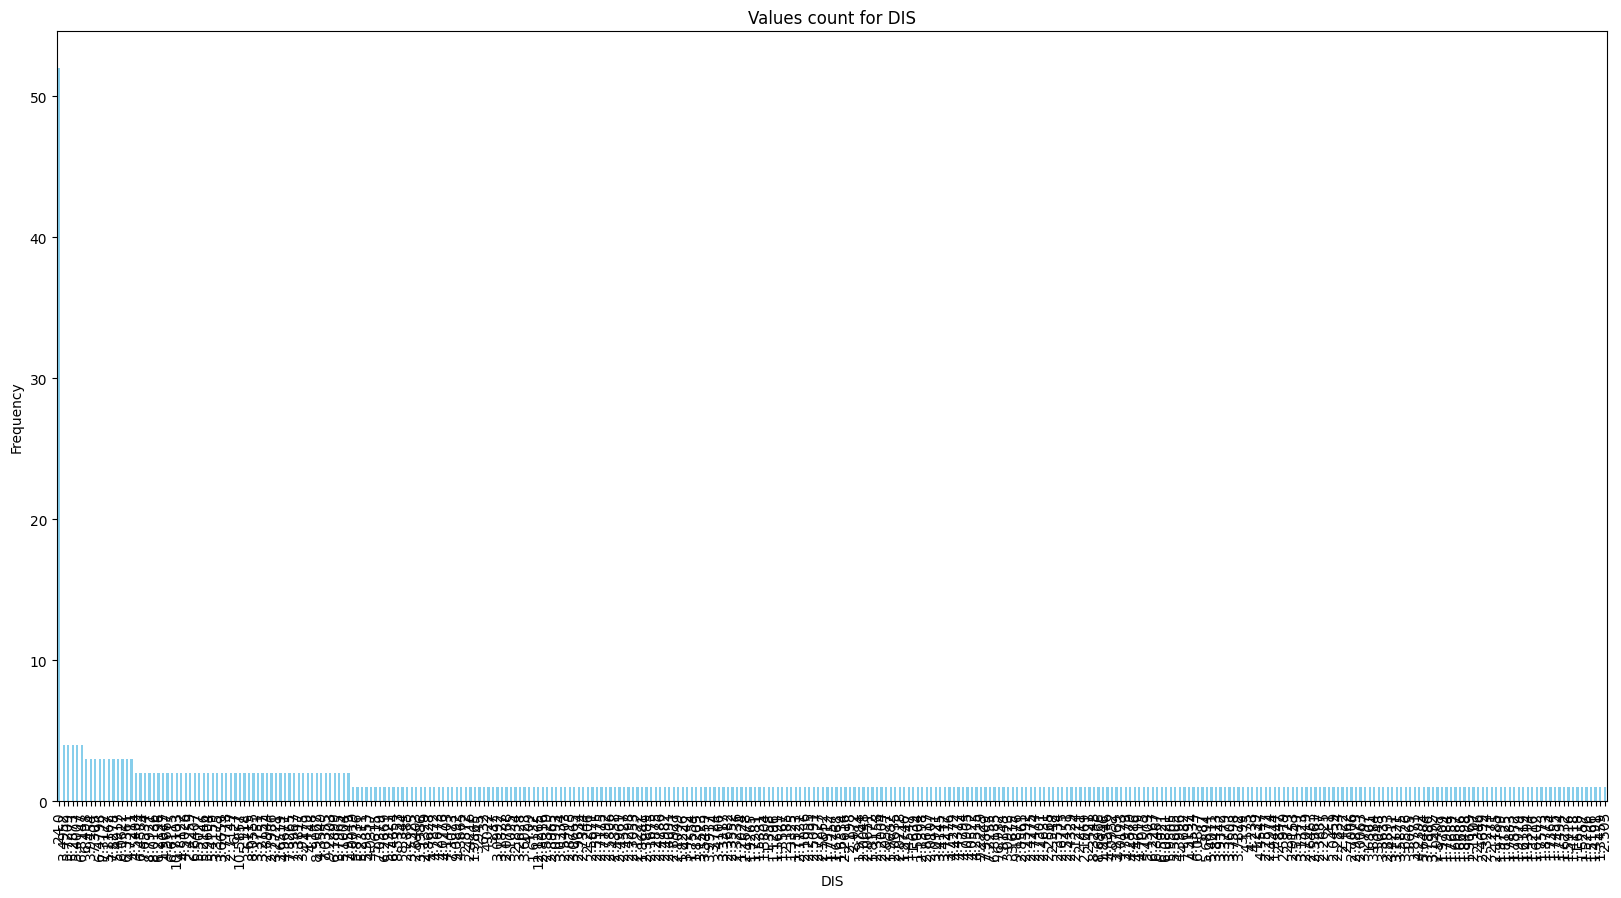

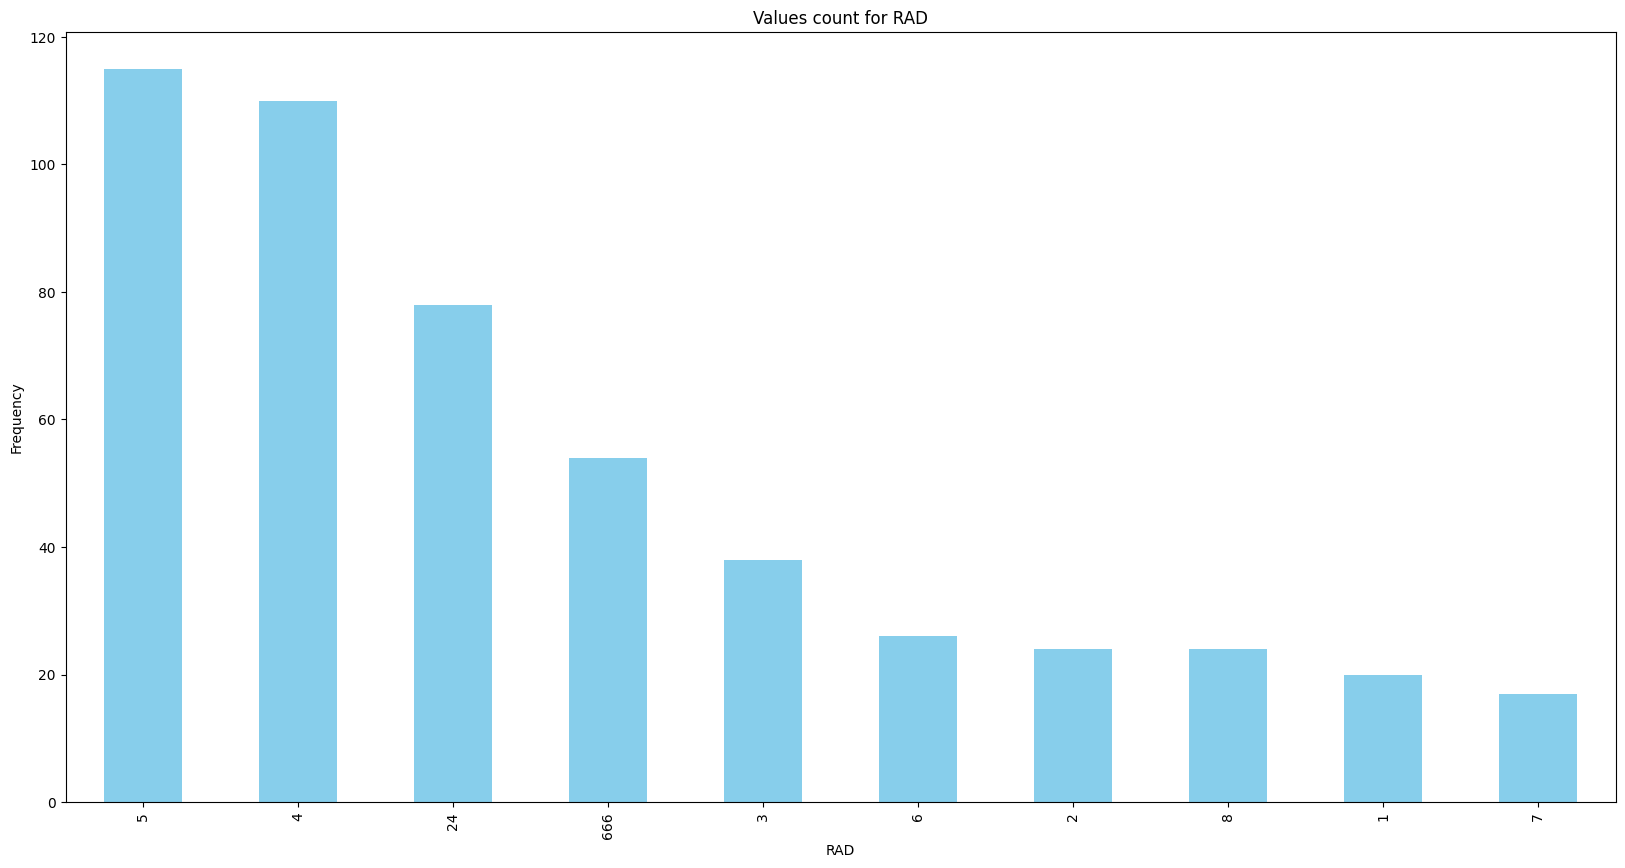

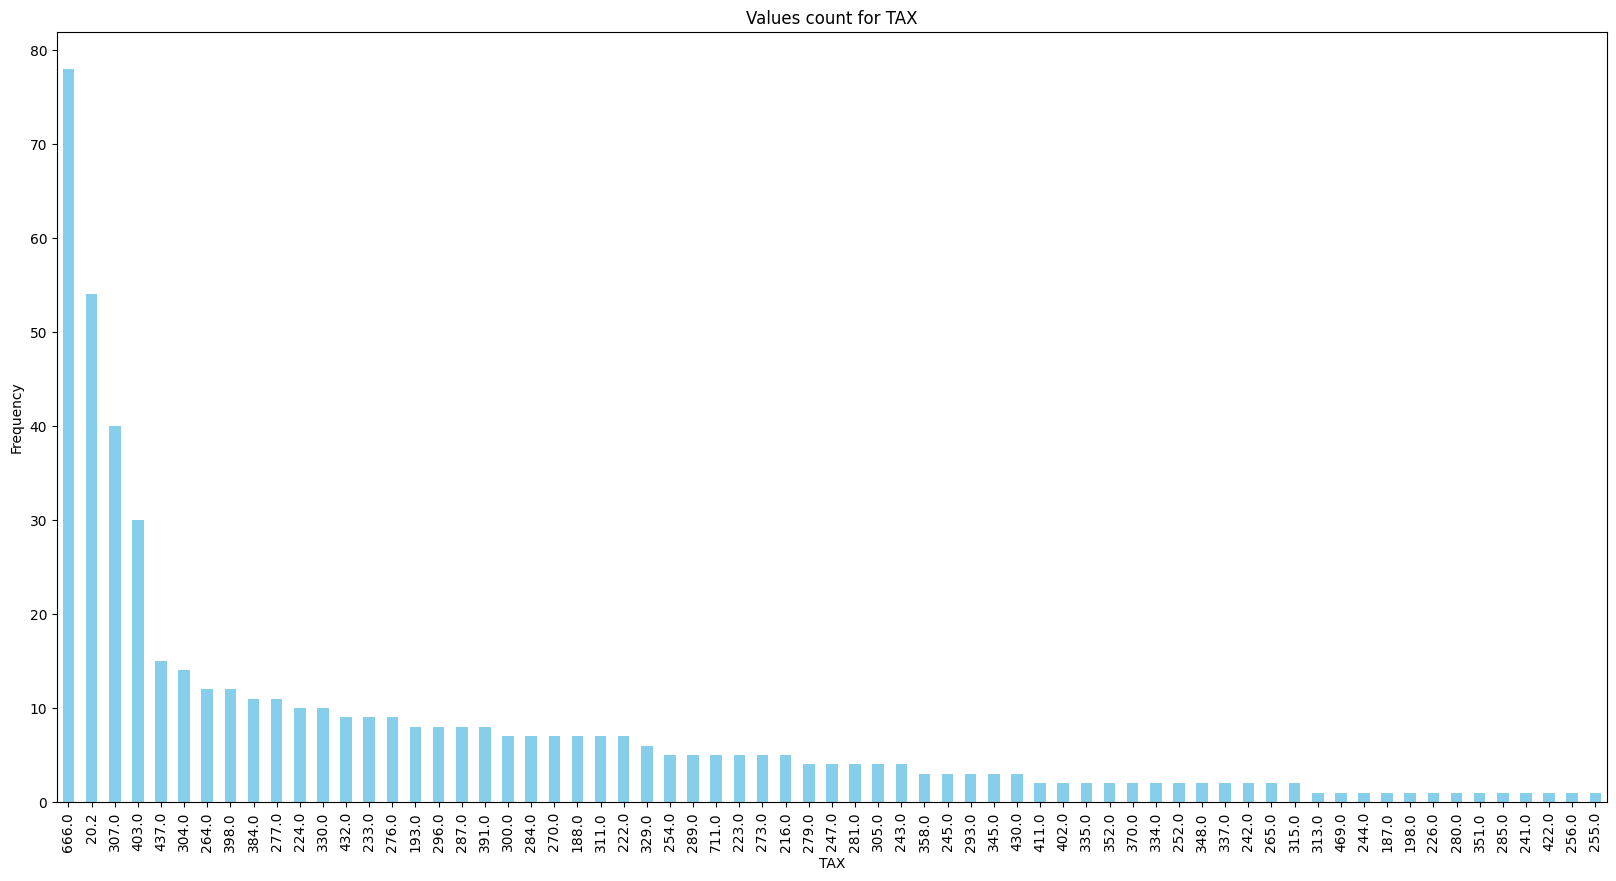

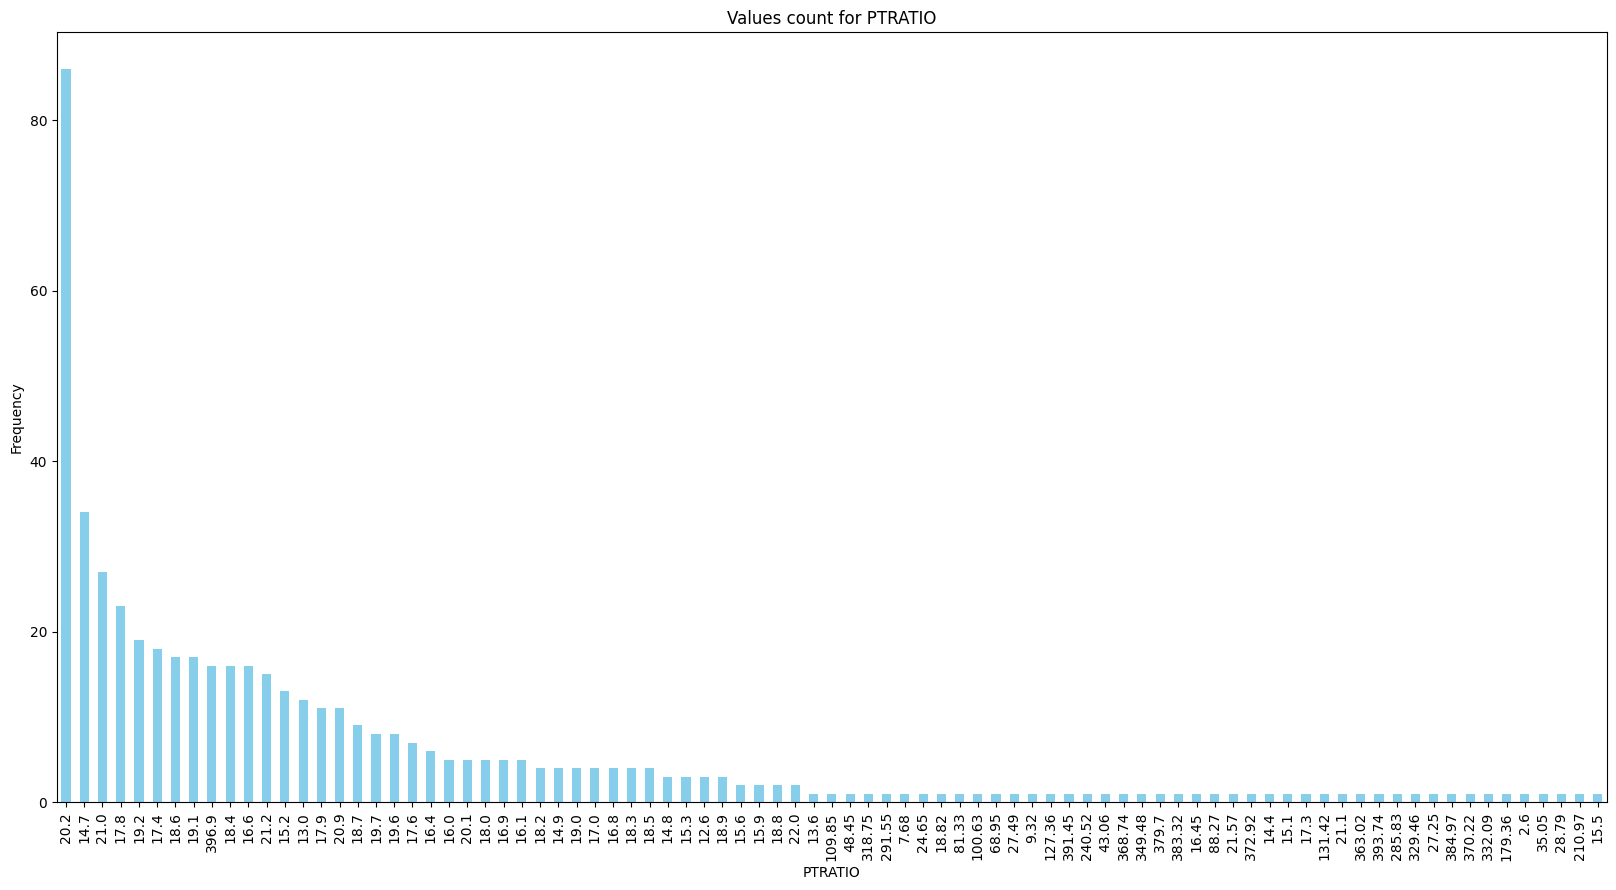

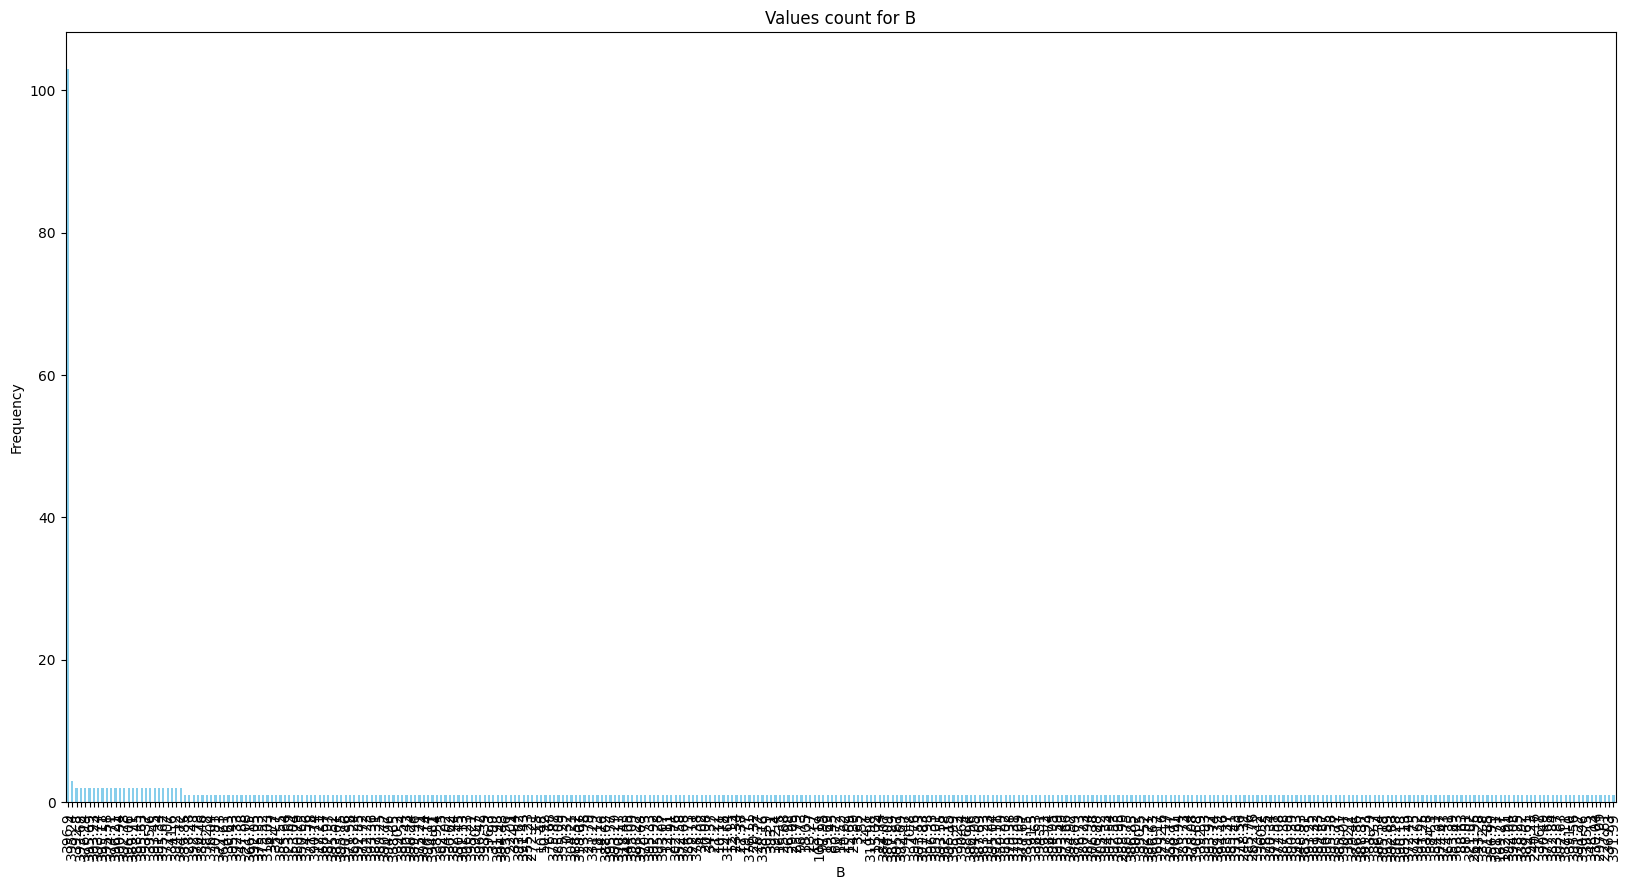

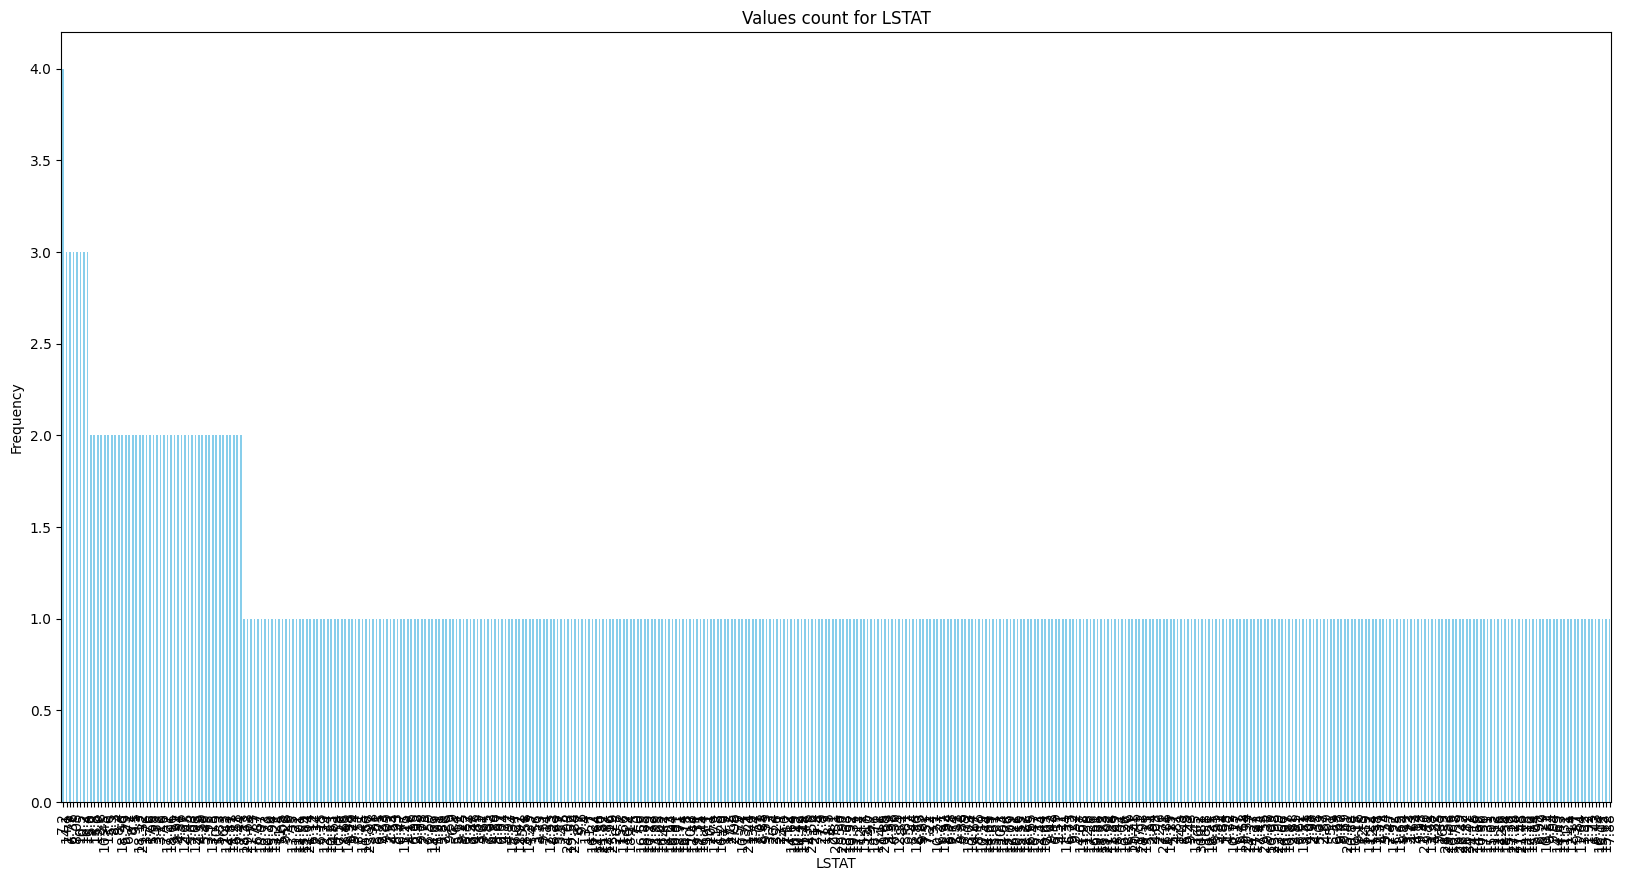

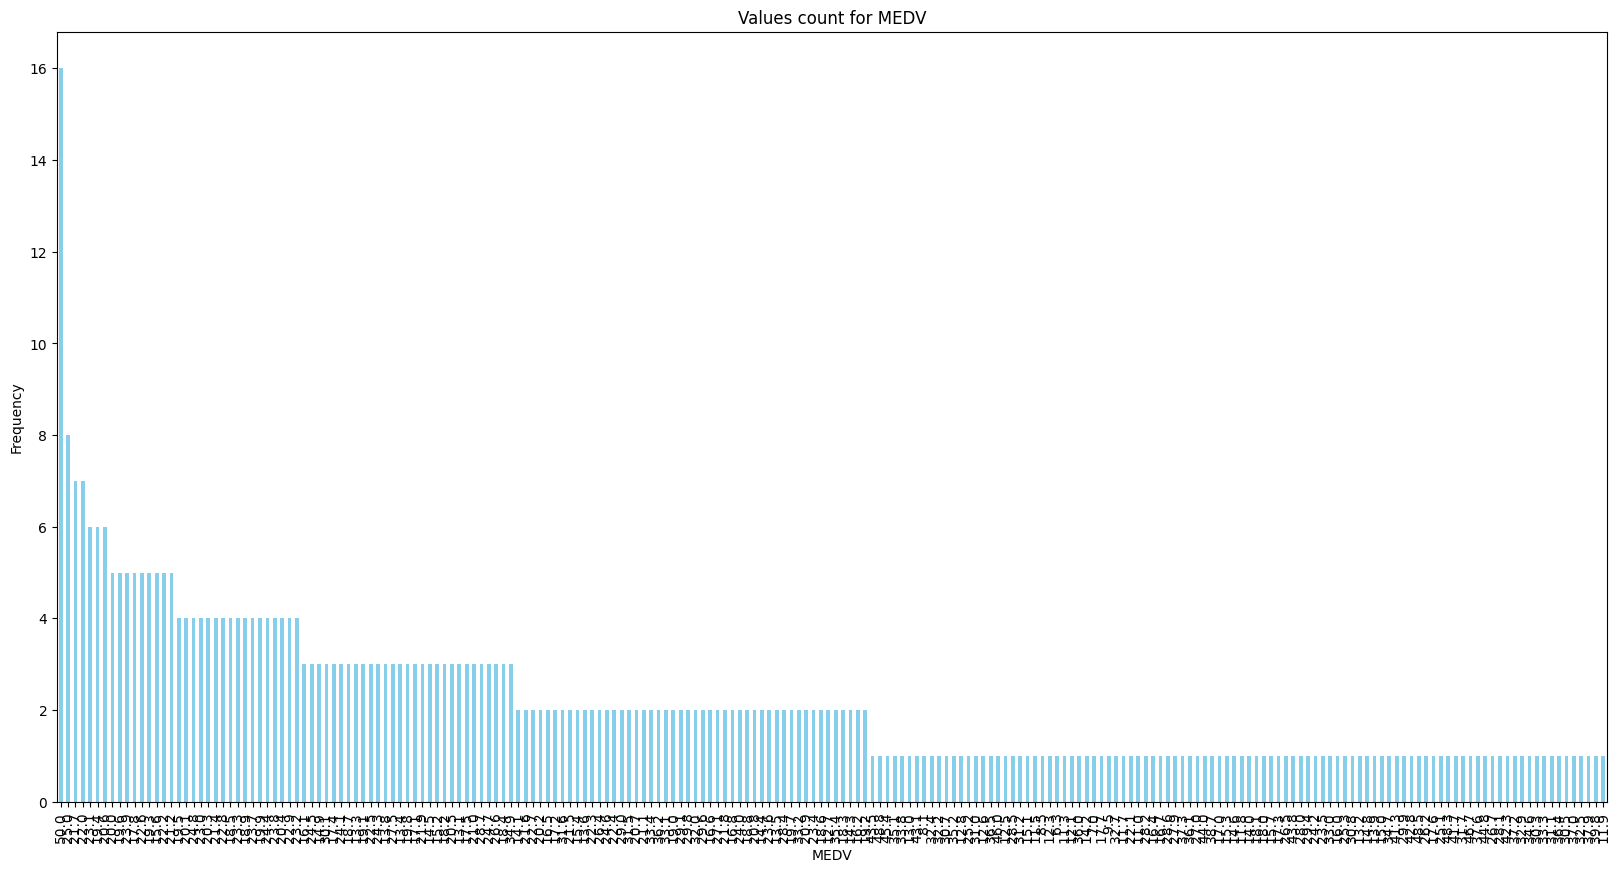

In [ ]:
for attribute in boston_house.columns:
  plt.figure(figsize=(20, 10))
  boston_house[attribute].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f'Values count for {attribute}')
  plt.xlabel(attribute)
  plt.ylabel('Frequency')
  plt.show()

The number of unique values in a column can significantly impact its value in machine learning, depending on the type of model you are building and the nature of your data. Here are some general guidelines:
- Categorical Columns:
    - **Few Unique Values**: Columns with a small number of unique values (e.g., binary features, low cardinality categorical features) are often very useful. These can be one-hot encoded or ordinal encoded easil
    - **Moderate Unique Values**: Columns with a moderate number of unique values (e.g., tens to a few hundred) can also be valuable, but care must be taken with encoding methods to avoid the curse of dimensionality.
    - **High Unique Values:**Columns with a very high number of unique values (e.g., thousands) can be challenging. They might lead to sparse matrices if one-hot encoding is used, and in such cases, techniques like embedding layers or target encoding might be necessary.
- Numerical Columns:
    - **Few Unique Values:**Numerical columns with a very limited number of unique values might indicate discretized or binned data, which can still be useful but may require different handling.
    - **Continuous Values**:Columns with many unique numerical values (continuous data) are generally very valuable as they can provide detailed information to the model.
  
The value of a column in machine learning is context-dependent. By analyzing the number of unique values and combining this with domain knowledge and statistical measures, you can make informed decisions about which columns to include in your model.

### Feature Correlations

Correlation is a statistical measure that expresses the extent to which two variables are linearly related Correlation refers to the degree to which the variables change together or co-vary.<br>
Knowing the correlation helps uncover important relationships between elements we are investigating. It provides insight into how changes in one variable may correlate with or predict changes in another. As researchers we rely on correlation to better understand the links between different phenomena.<br>
The correlation coefficient quantifies the strength and direction of the correlation. Values closer to 1 or -1 represent stronger correlations, while those closer to 0 indicate little connection between the variables.
**Why correlation is important for machine learning?**
- **Feature selection**: which is the process of choosing which variables or features to use in the model. Highly correlated features provide redundant information, so feature selection aims to remove uninformative features to simplify models.
- **Reduce Bias**: Correlation analysis is also important for ensuring model fairness and avoiding bias. When certain features are highly correlated with sensitive attributes like gender or ethnicity, it can inadvertently encode biases into machine learning models if not properly addressed.
- **Interpretability and Debugging**: Understanding correlations also aids in interpreting machine learning models. As models become increasingly complex with many interacting variables, it can be difficult to explain why a model makes certain predictions.

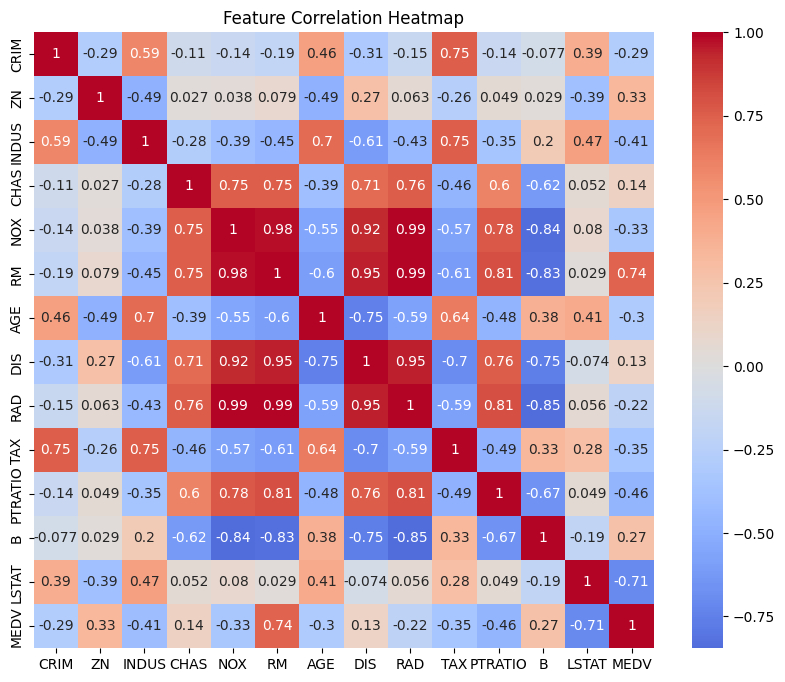

In [ ]:
correlation_matrix = boston_house.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

So, **RM**, **LSTAT**, **INDUS**, **PTRATIO** have the most correlation with **MEDV**(target var)

#### Scatter

A scatter plot displays individual data points based on their values for two variables, making it easy to observe relationships, clusters, and outliers.

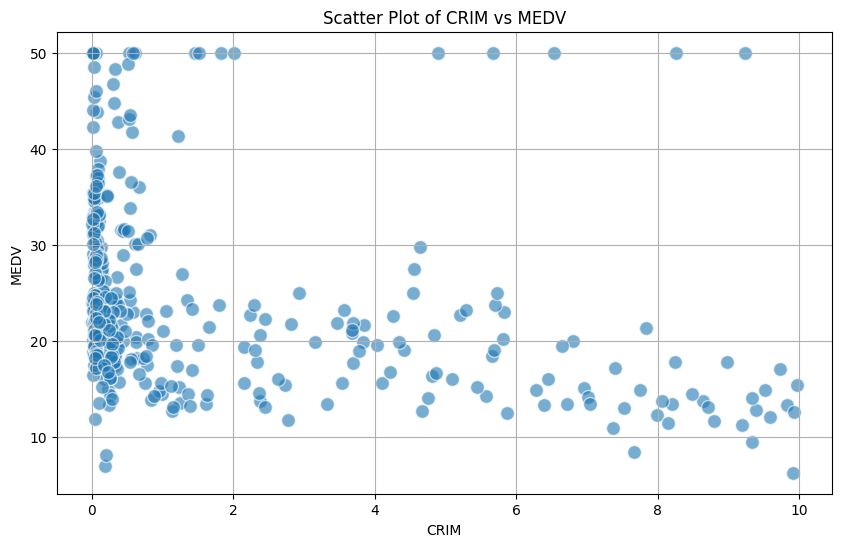

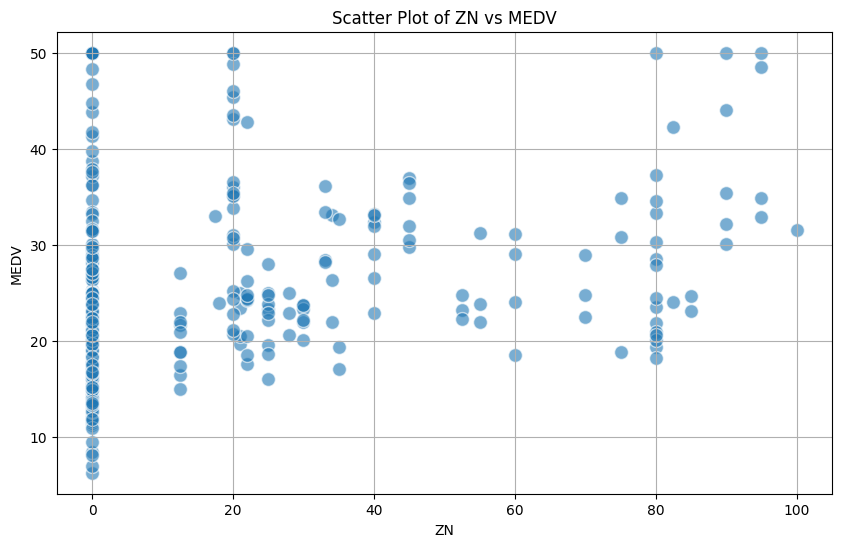

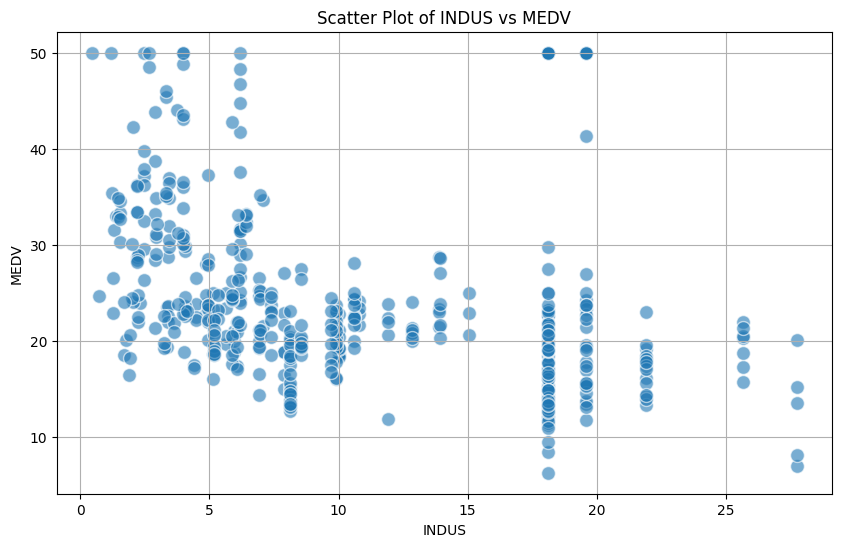

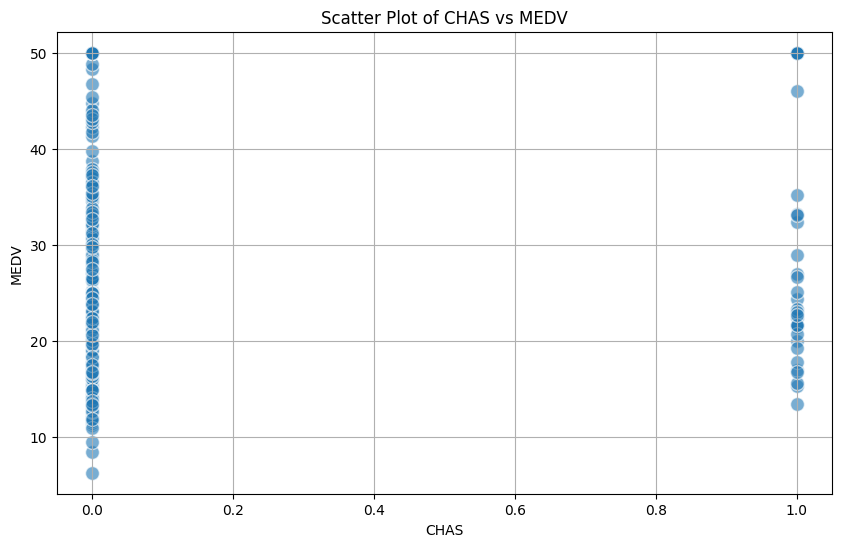

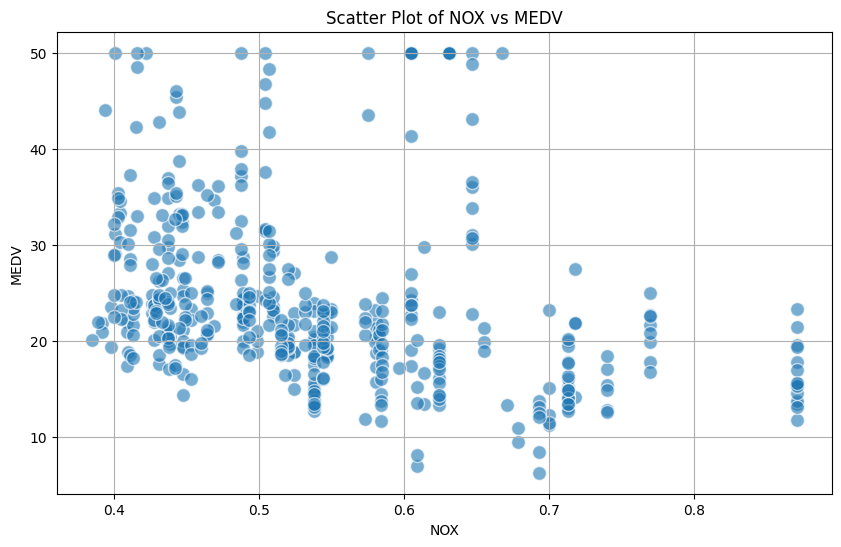

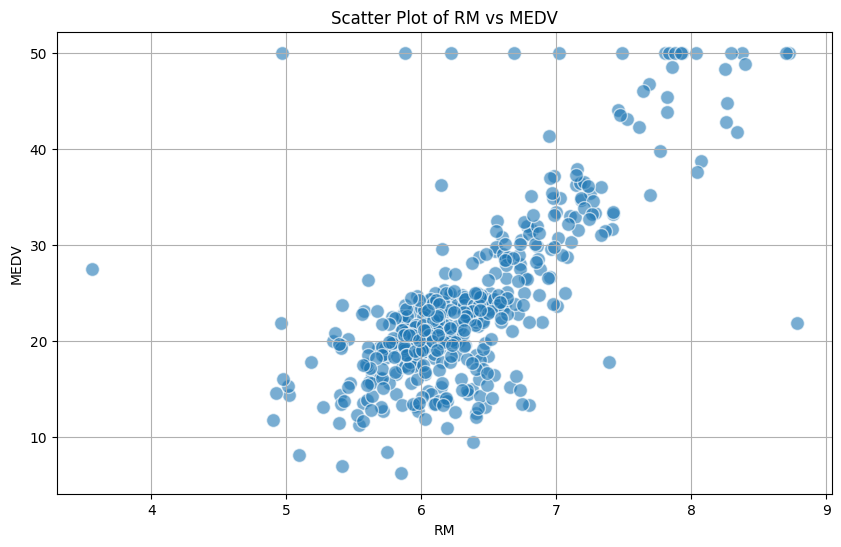

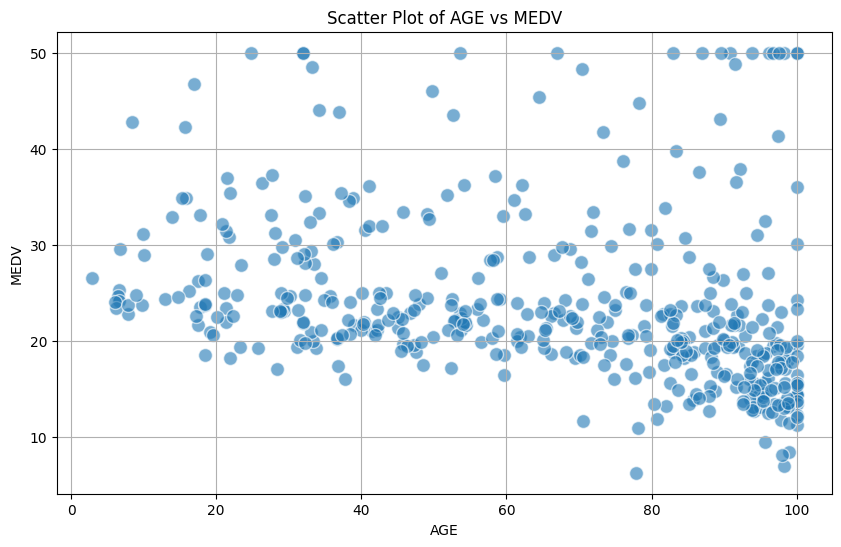

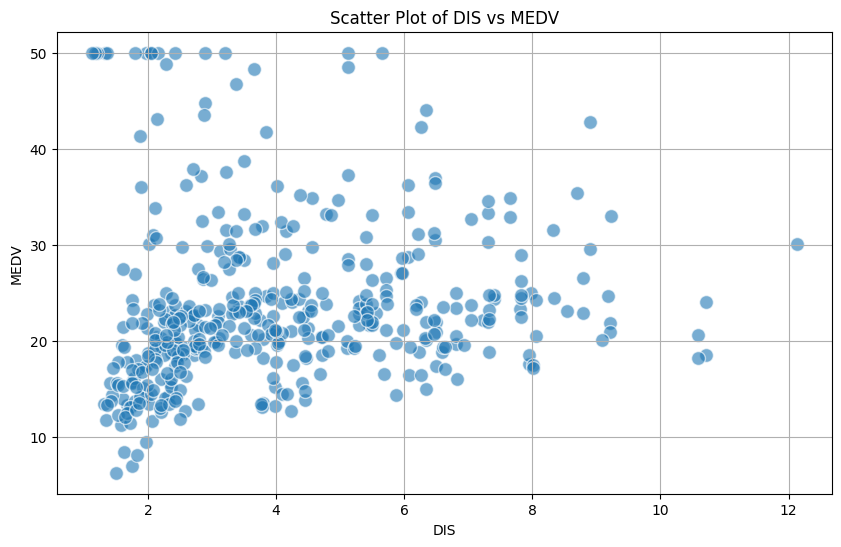

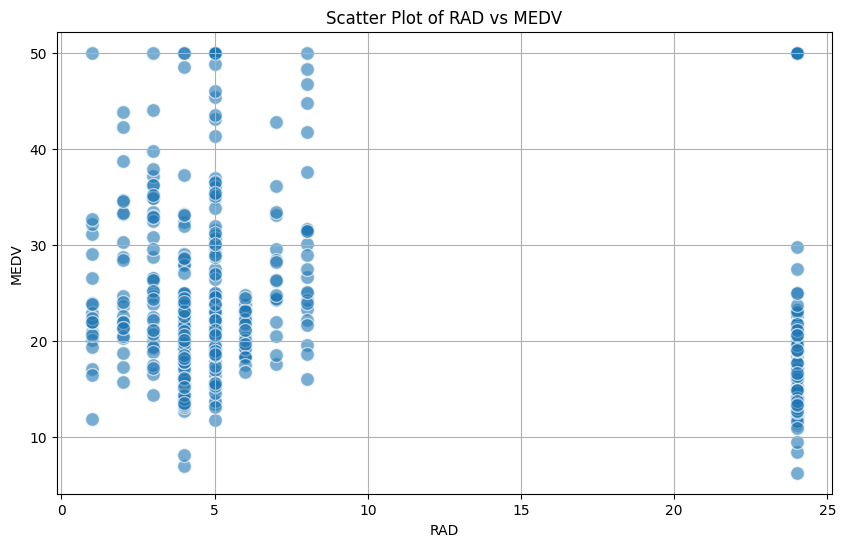

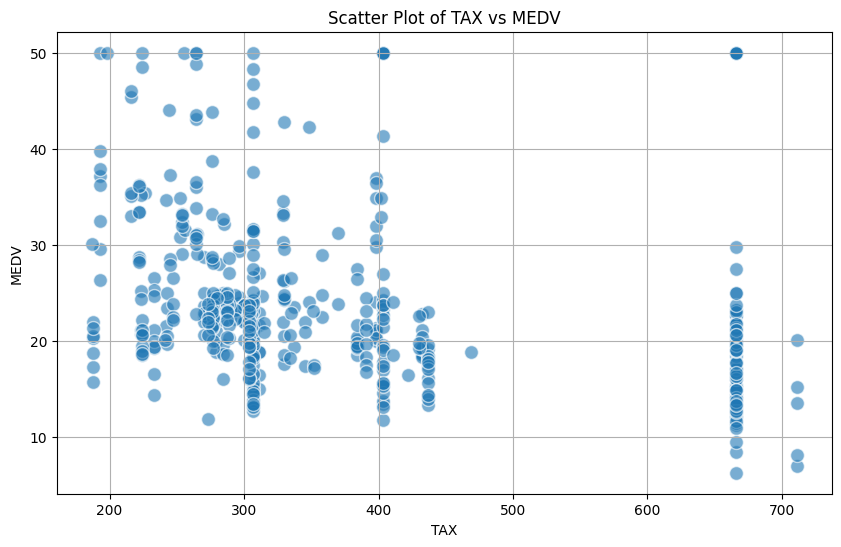

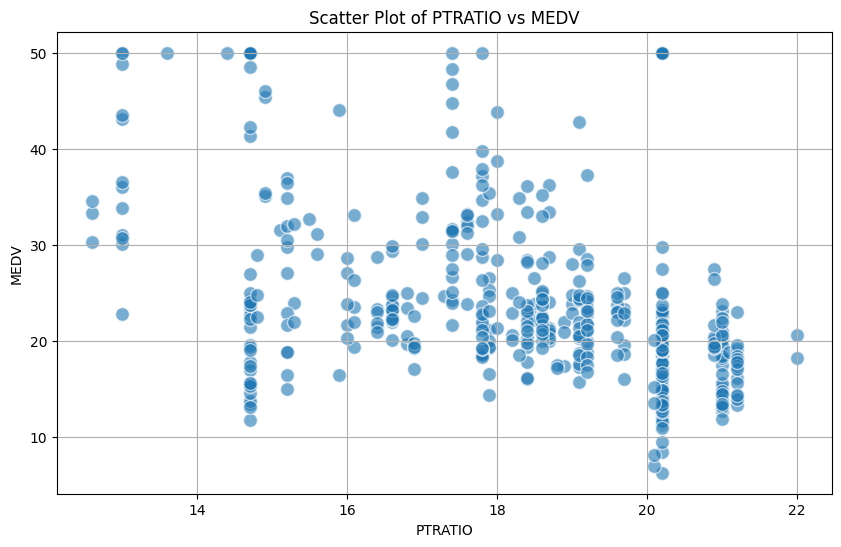

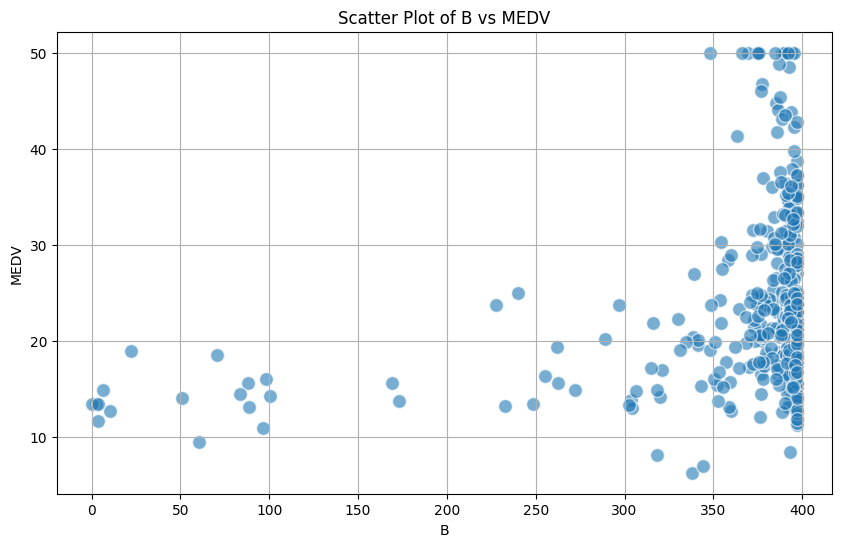

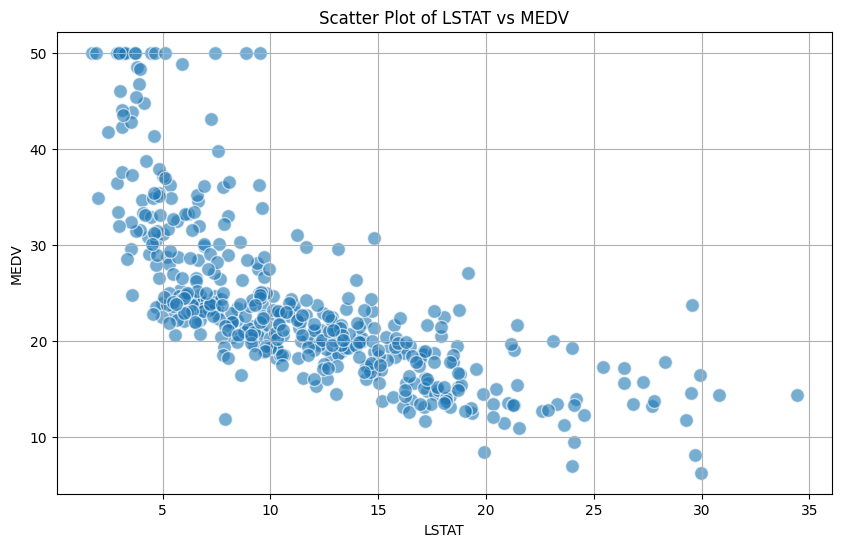

In [ ]:
for attribute in boston_house.columns:
  if attribute == 'MEDV': continue

  plt.figure(figsize=(10, 6))
  plt.scatter(boston_house[attribute], boston_house['MEDV'],
              alpha=0.6, edgecolors='w', s=100)
  plt.title(f'Scatter Plot of {attribute} vs MEDV')
  plt.xlabel(attribute)
  plt.ylabel('MEDV')
  plt.grid(True)
  plt.show()

#### Hexbin

A hexbin plot is useful for visualizing the density of data points when dealing with large datasets. It bins data points into hexagonal bins and uses color to represent the number of points in each bin.

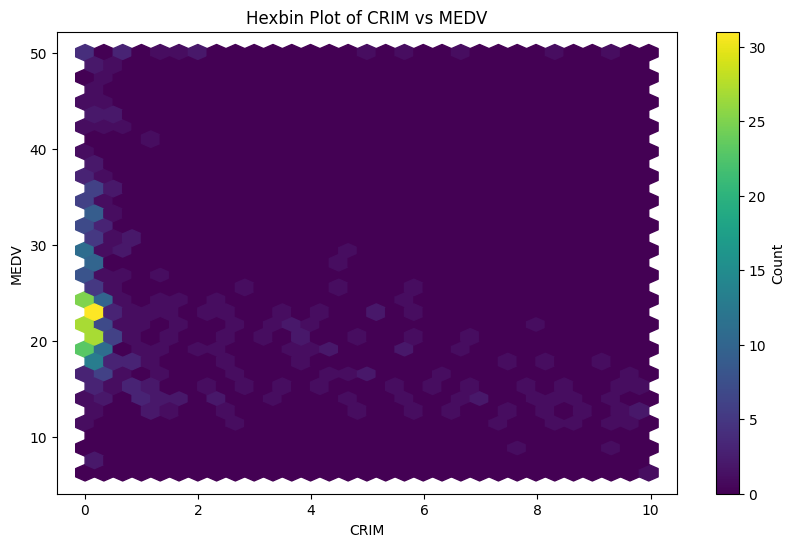

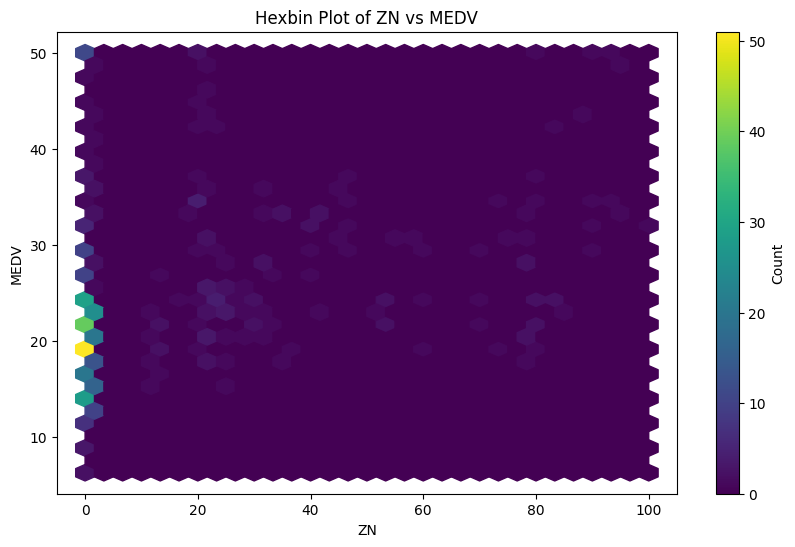

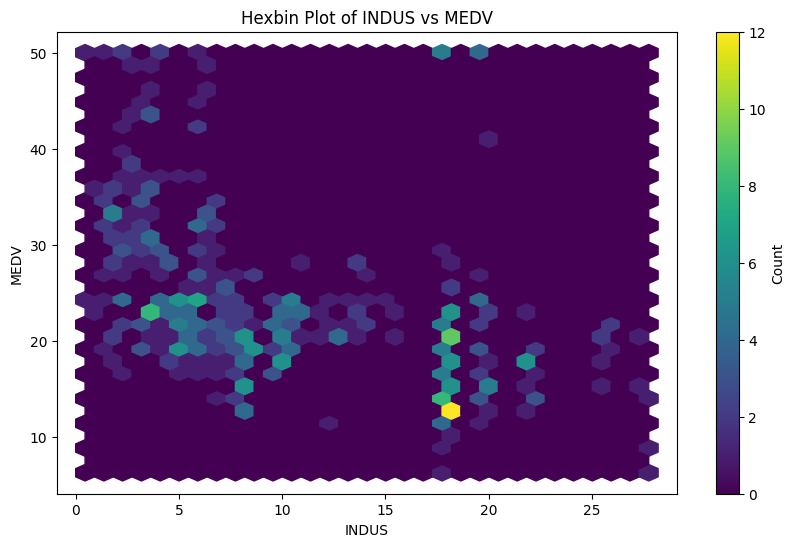

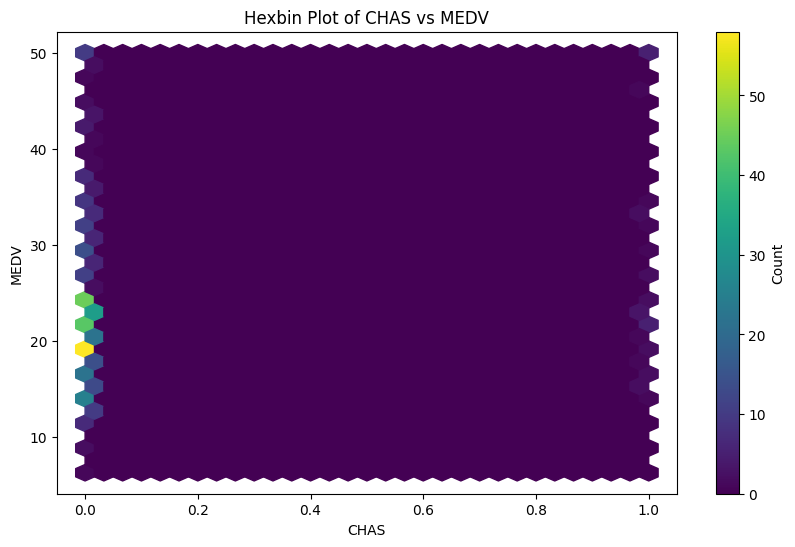

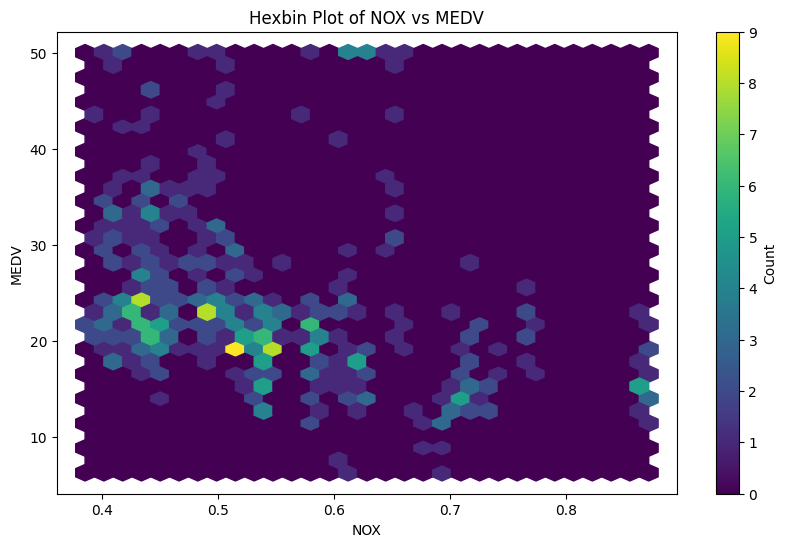

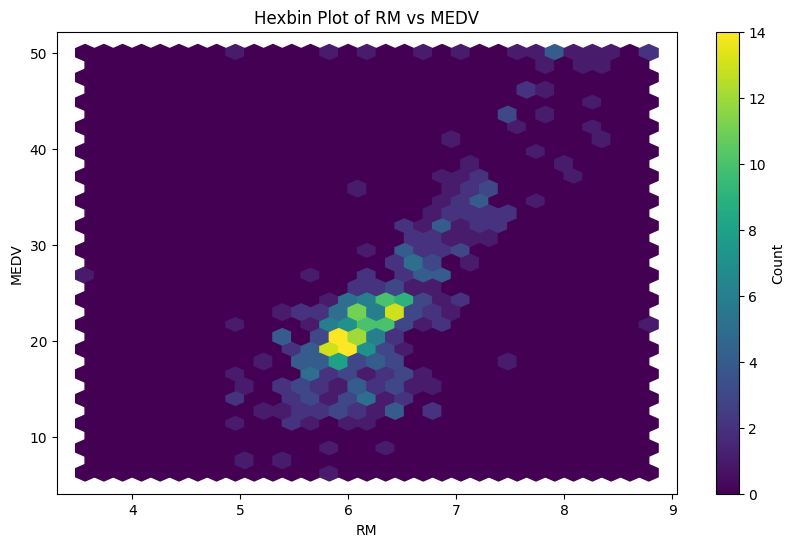

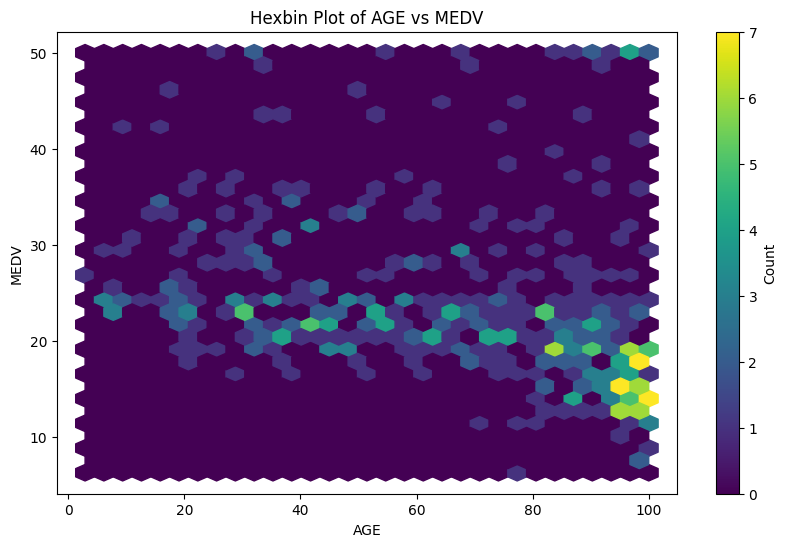

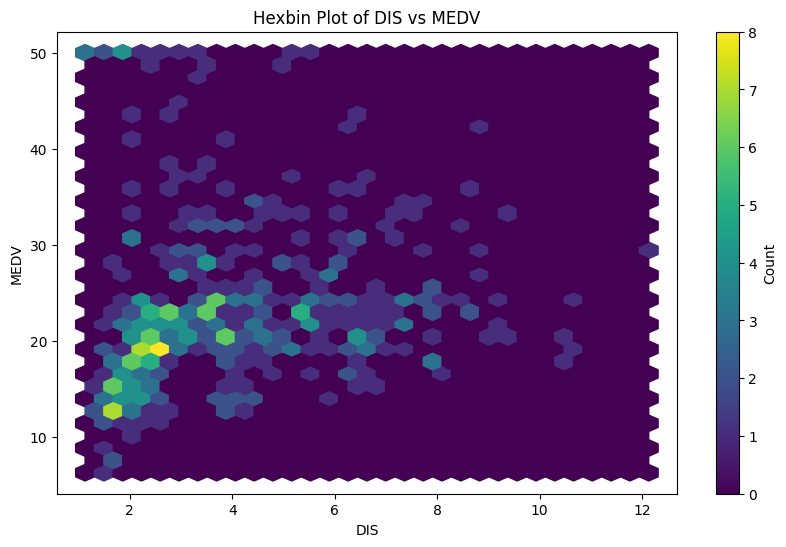

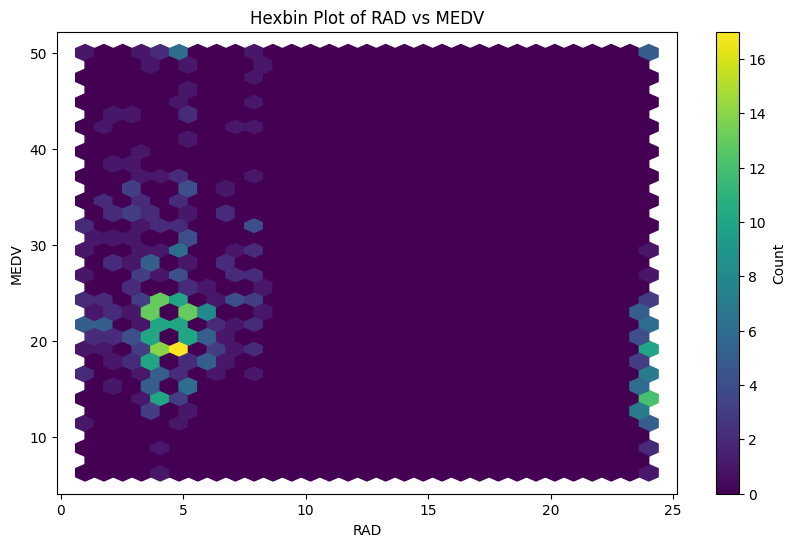

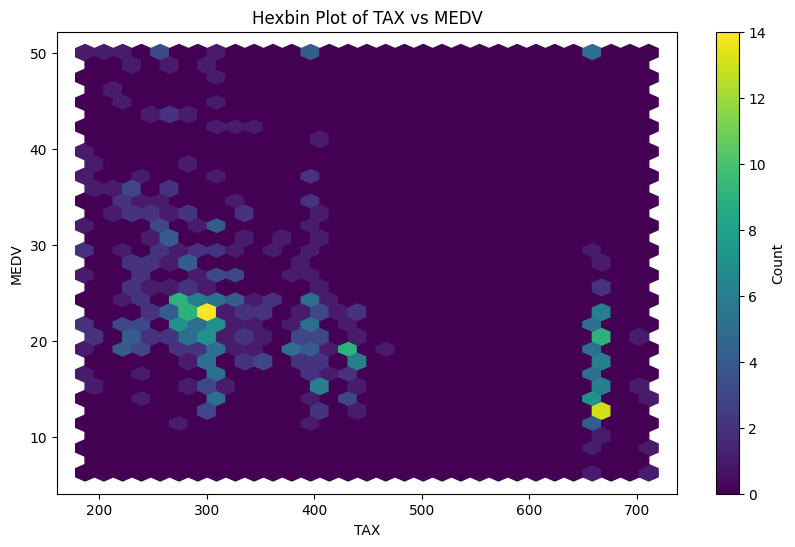

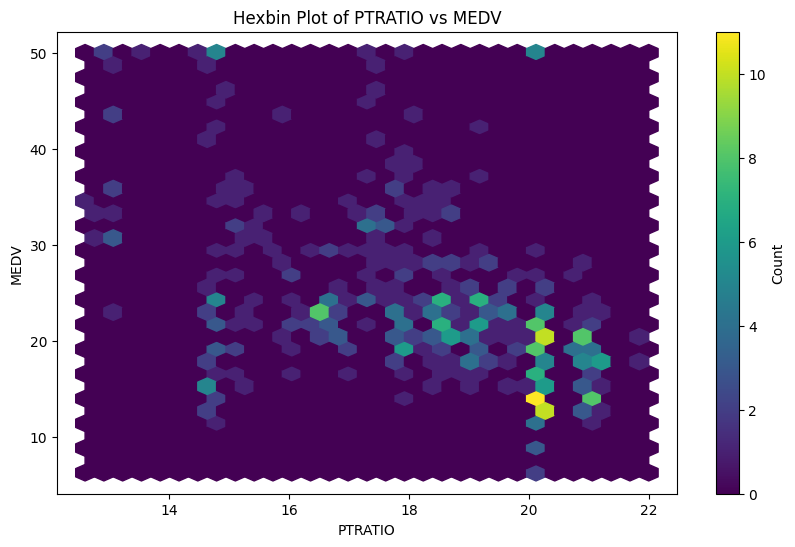

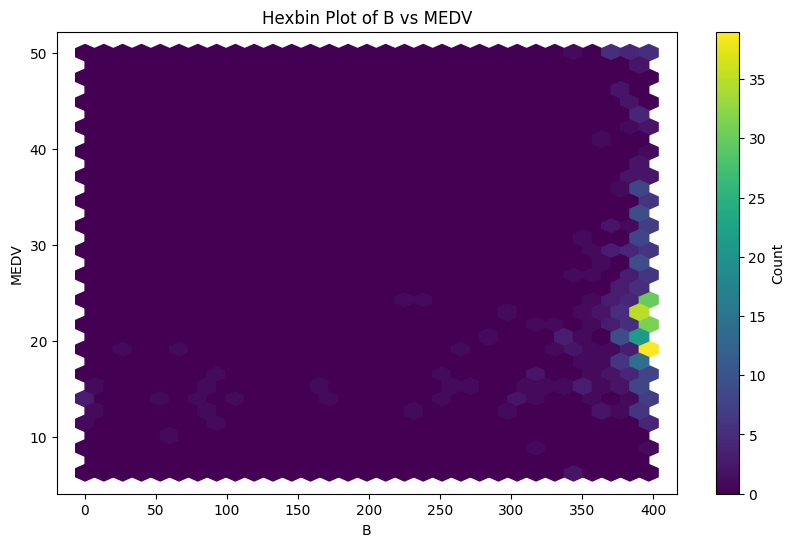

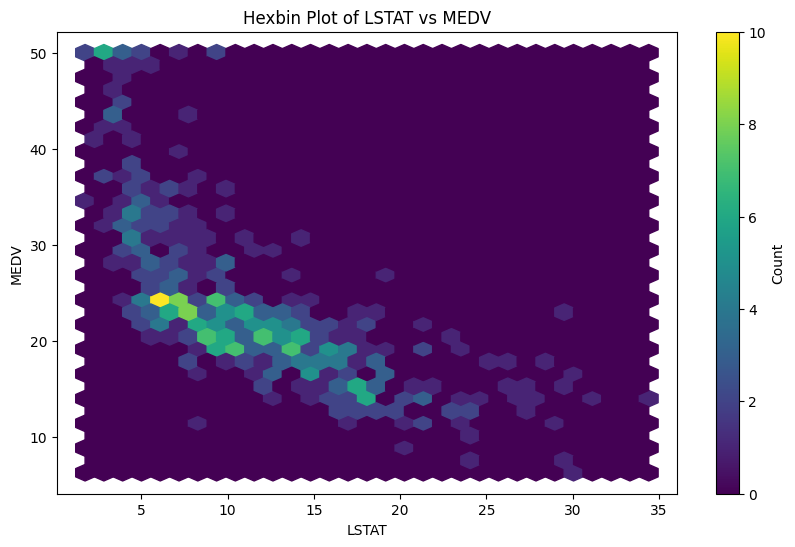

In [ ]:
for attribute in boston_house.columns:
  if attribute == 'MEDV': continue

  plt.figure(figsize=(10, 6))
  hb = plt.hexbin(boston_house[attribute], boston_house['MEDV'],
                  gridsize=30, cmap='viridis')
  cb = plt.colorbar(hb, label='Count')
  plt.title(f'Hexbin Plot of {attribute} vs MEDV')
  plt.xlabel(attribute)
  plt.ylabel('MEDV')
  plt.show()

### Performing Variable Analysis

Variable analysis can be either univariate, bivariate, or multivariate. Each of them provides insights into the distribution and correlations between the dataset's variables. Techniques vary depending on the number of variables analyzed:

#### Univariate

The main focus in univariate analysis is on examining each variable within our dataset on its own. During this analysis, we can uncover insights such as the median, mode, maximum, range, and outliers.

This type of analysis is applicable to both categorical and numerical variables.

#### Bivariate

Bivariate analysis aims to reveal insights between two chosen variables and focuses on understanding the distribution and relationship between these two variables.

As we analyze two variables at the same time, this type of analysis can be trickier. It can encompass three different pairs of variables: numerical-numerical, numerical-categorical, and categorical-categorical.

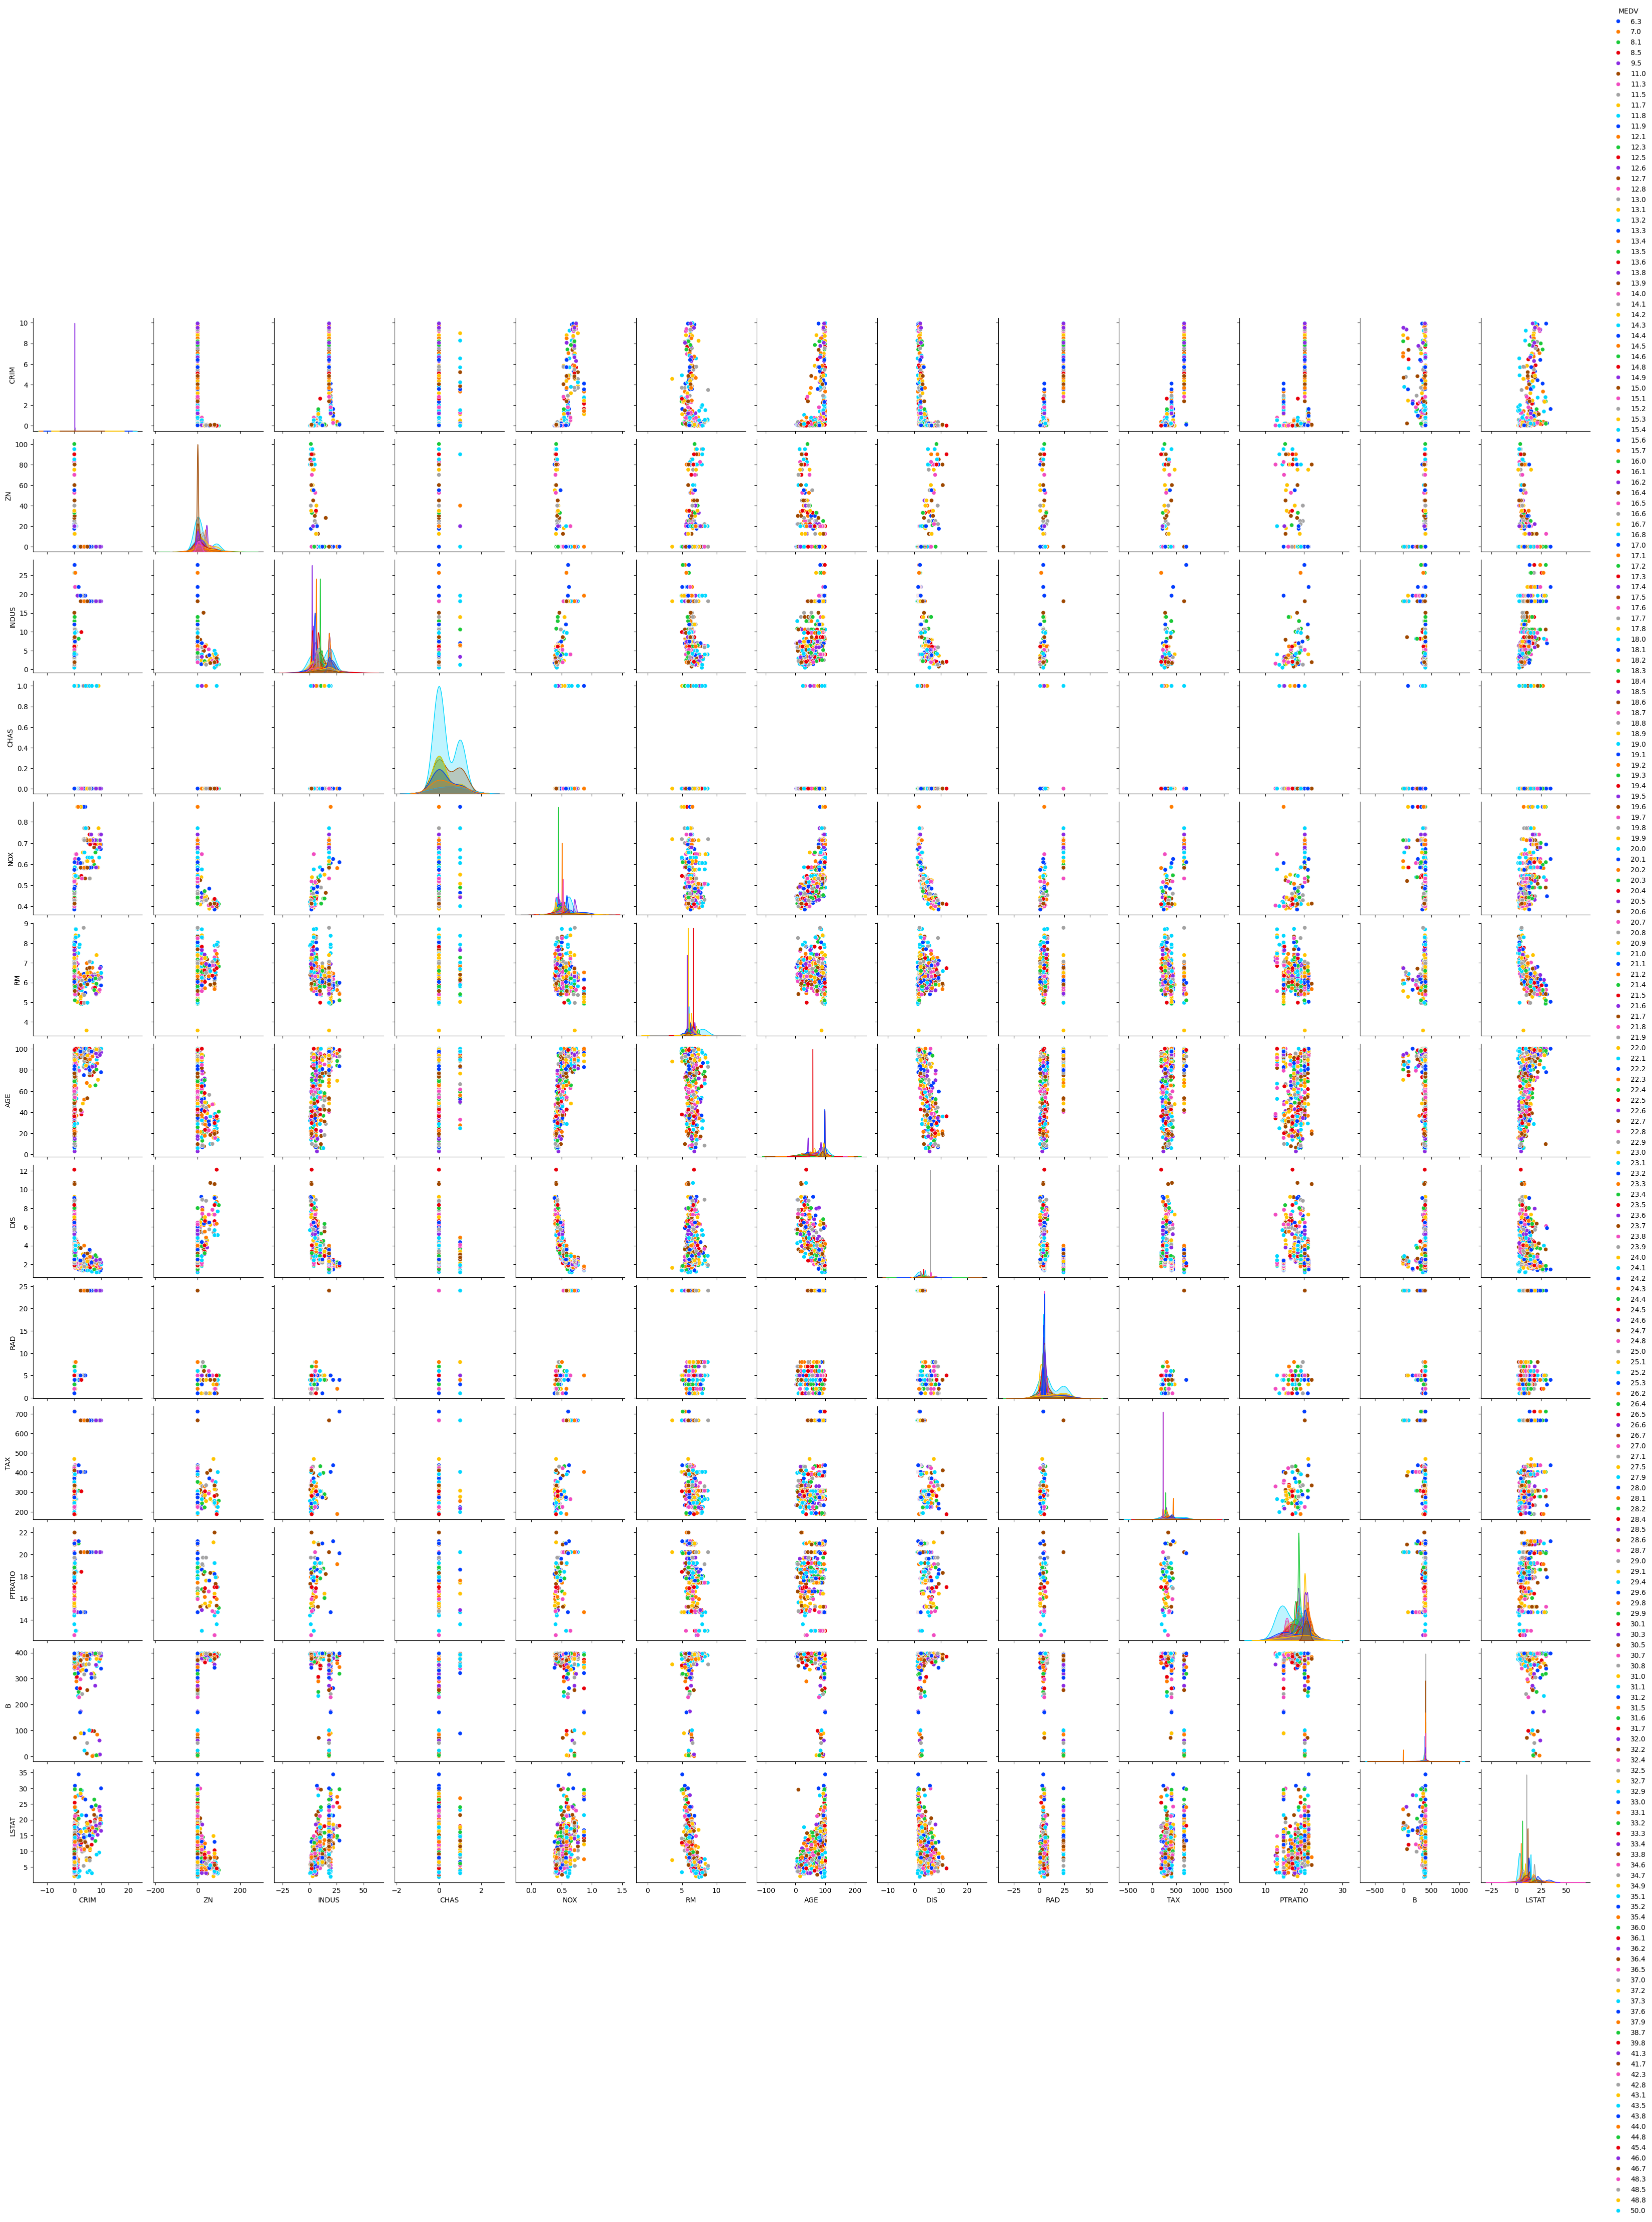

In [ ]:
sns.pairplot(boston_house, hue='MEDV', diag_kind='kde', palette='bright')

#### Multivariate

A frequent challenge with large datasets is the simultaneous analysis of multiple variables. Even though univariate and bivariate analysis methods offer valuable insights, this is usually not enough for analyzing datasets containing multiple variables (usually more than five).

This issue of managing high-dimensional data, usually referred to as the curse of dimensionality, is well-documented. Having a large number of variables can be advantageous as it allows the extraction of more insights. At the same time, this advantage can be against us due to the limited number of techniques available for analyzing or visualizing multiple variables concurrently.

## Data Preprocessing
Missing values are a common issue in machine learning. This occurs when a particular variable lacks data points, resulting in incomplete information and potentially harming the accuracy and dependability of your models. It is essential to address missing values efficiently to ensure strong and impartial results in your machine-learning projects

### Strategies for Handling Missing Value

In [ ]:
boston_house.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [4]:
boston_house_cleaned = boston_house.copy()

#### Removing Rows with Missing Values

- Simple and efficient: Removes data points with missing values altogether.
- Reduces sample size: Can lead to biased results if missingness is not random
- Not recommended for large datasets: Can discard valuable information.

because MEDV is our target var and our problem is regression, the nan value is not valuable for us, so let's remove those rows that hav nan MEDV

In [5]:
boston_house_cleaned.dropna(subset=['MEDV'], inplace=True)
boston_house_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
boston_house_cleaned.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       24
NOX         0
RM          0
AGE         0
DIS        25
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [ ]:
boston_house_cleaned.shape

(452, 14)

#### Imputation Methods

- Replacing missing values with estimated values
- Preserves sample size: Doesn’t reduce data points.
- Can introduce bias: Estimated values might not be accurate.

Here are some common imputation methods:

##### Mean, Median, and Mode Imputation:


- Replace missing values with the mean, median, or mode of the relevant variable.
- Simple and efficient: Easy to implement.
- Can be inaccurate: Doesn’t consider the relationships between variables.

Now, for handling missing values for column B, we use mean as our imputation method

In [6]:
boston_house_cleaned['B'].fillna(boston_house_cleaned['B'].mean(),
                                 inplace=True)

In [ ]:
boston_house_cleaned.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       24
NOX         0
RM          0
AGE         0
DIS        25
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

##### Forward and Backward Fill


- Replace missing values with the previous or next non-missing value in the same variable.
- Simple and intuitive: Preserves temporal order.
- Can be inaccurate: Assumes missing values are close to observed values

These fill methods are particularly useful when there is a logical sequence or order in the data, and missing values can be reasonably assumed to follow a pattern. The method parameter in fillna() allows to specify the filling strategy, and here, it’s set to ‘ffill’ for forward fill and ‘bfill’ for backward fill.

- Forward fill uses the last valid observation to fill missing values.
- Backward fill uses the next valid observation to fill missing values.

#### Interpolation Techniques

- Estimate missing values based on surrounding data points using techniques like linear interpolation or spline interpolation.
- More sophisticated than mean/median imputation: Captures relationships between variables.
- Requires additional libraries and computational resources.

##### Linear Interpolation

Linear interpolation assumes a straight line between two adjacent non-missing values.

##### Quadratic Interpolation

Quadratic interpolation assumes a quadratic curve that passes through three adjacent non-missing values.

#### Prediction

Prediction is a statistical method that involves using the values of other variables to predict the missing values. This method can be used when there is a relationship between the variables in the data

Let's use KNN to predict missing values for DIS attribute.

In [8]:
boston_house_features = boston_house_cleaned.loc[:, boston_house_cleaned.columns != 'MEDV']
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(boston_house_features)
imputed = pd.DataFrame(imputed, columns=boston_house_features.columns)
boston_house_cleaned.loc[:, 'DIS'] = imputed['DIS']

In [ ]:
boston_house_cleaned.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       24
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

Now, let's impute CHAS column using random forest classifier

In [9]:
X = boston_house_cleaned.dropna().drop("CHAS", axis=1).values
Y = boston_house_cleaned.dropna()["CHAS"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False,
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, Y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: TRAIN=0.9688 TEST=0.8605
LOG LOSS: 0.21214434107942406


In [10]:
buston_house_with_CHAS = boston_house_cleaned[boston_house_cleaned['CHAS'].notna()]
buston_house_no_CHAS = boston_house_cleaned[boston_house_cleaned['CHAS'].isna()]
buston_house_no_CHAS = buston_house_no_CHAS.drop('CHAS', axis=1)
prediction = forest.predict(buston_house_no_CHAS.values)
buston_house_no_CHAS.insert(0, 'CHAS', prediction)
frames = [buston_house_with_CHAS, buston_house_no_CHAS]
boston_house_cleaned = pd.concat(frames)

In [ ]:
boston_house_cleaned.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
boston_house_cleaned

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
433  4.83567   0.0  18.10   0.0  0.583  5.905  53.2  3.1523   24  666.0   
434  0.15086   0.0  27.74   0.0  0.609  5.454  92.7  1.8209    4  711.0   
435  0.18337   0.0  27.74   0.0  0.609  5.414  98.3  1.7554    4  711.0   
436  0.20746   0.0  27.74   0.0  0.609  5.093  98.0  1.8226    4  711.0   
437  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681    4  711.0   

     PTRATIO           B  LSTAT  MEDV  
0       15.3  396.900000   4.98  24.0  
1       17.8  396.900000   9.14  21.6  
2       17.8  392.830000   4.03  34.7  
3       18.7  369.650773   2.94  33.4  
4       18.7  396.900000   5.33  36.2  
..       ...         ...    ...   ...  
433     20.2  388.220000  11.45  20.6  
434     20.1  395.090000  18.06  15.2  
435     20.1  344.050000  23.97   7.0  
436     20.1  318.430000  29.68   8.1  
437     20.1  390.110000  18.07  13.6  

[452 rows x 14 columns]

In [ ]:
boston_house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 437
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [ ]:
boston_house_cleaned.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.070796    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.256769    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.044987    7.823009  377.442478   18.247124  369.650773   
std     28.127025    2.097174    7.543494  151.327573    2.200064   68.384000   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     40.950000    2.341350    4.000000  276.750000   16.800000  376.925000   
50%     71.800000    3.539200    5.000000  307.000000   18.600000  391.955000   
75%     91.625000    5.404800    7.000000  411.000000   20.200000  396.060000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  452.000000  452.000000  
mean    11.441881   23.750442  
std      6.156437    8.808602  
min      1.730000    6.300000  
25%      6.587500   18.500000  
50%     10.250000   21.950000  
75%     15.105000   26.600000  
max     34.410000   50.000000

### Dropping Columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame to make it easier for you to focus on the remaining columns.<br>
If we have a lot of missing values in a column, we can just remove that column from our dataset. The only problem with this method is that we lose some information needed by our model to make accurate predictions.<br>
Also We can remove the columns which have a low correlation with the target.
In this case, we can remove the **CHAS** and **DIS** features as they have a correlation of 13% and 14% with the target.




In [ ]:
boston_house_cleaned.drop(['CHAS', 'DIS',], axis=1, inplace=True)

In [ ]:
boston_house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 437
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   NOX      452 non-null    float64
 4   RM       452 non-null    float64
 5   AGE      452 non-null    float64
 6   RAD      452 non-null    int64  
 7   TAX      452 non-null    float64
 8   PTRATIO  452 non-null    float64
 9   B        452 non-null    float64
 10  LSTAT    452 non-null    float64
 11  MEDV     452 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 45.9 KB


### Categorical and Numerical features

#### Categorical




Categorical data can be put in groups or categories using names or labels. Each piece of a categorical dataset, also known as qualitative data.


*   **Nominal**: This is the data category that names or labels its categories. It has features resembling a noun and is occasionally referred to as naming data.
*  **Ordinary** : Elements with rankings, orders, or rating scales are included in this category of categorical data. Nominal data can be ordered and counted but not measured.

In this dataset **CHAS** and **RAD** are categorical features, both are nominal.

#### Numerical



Data expressed in numerical terms rather than in natural language descriptions are called numerical data. It can only be gathered in numerical form, keeping its name. This numerical data type also referred to as quantitative data can be used to measure a person’s height, weight, IQ, etc.


1.   **Discrete**: Countable numerical data are discrete data. They are mapped one-to-one to natural numbers, in other words. Age, the number of students in a class, the number of candidates in an election, etc., are a few examples of discrete data in general.
2.   **Continuous**: This is an uncountable data type for numbers. A series of intervals on a natural number line is used to depict them. Student CGPA, height, and other continuous data types are a few examples.

Except RAD and CHAS, other features are numerical in this dataset


### Normalization and Standardization

#### Normalization

Normalization means scaling the values of the features to a fixed range. For example, we can scale the values of the features to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the MinMaxScaler method to do this. We can't use normarlziation when we are not using algorithms such as KNN or Neural Networks which are based on distance. Below is the formula for the StandardScaler method:
$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

#### Standardization

Standardization means scaling the values of the features to have a mean of 0 and a standard deviation of 1. This method is useful when we have features with different means and standard deviations. We can use the StandardScaler method to do this. Below is the formula for the StandardScaler method:
$$
X_{std} = \frac{X - 𝝻}{𝛔}
$$
Standardization can be helpful in cases where the data follows a Gaussian distribution

In [11]:
standardized = StandardScaler().fit_transform(boston_house_cleaned)
standardized = pd.DataFrame(standardized, columns=boston_house_cleaned.columns)

In [ ]:
standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   NOX      452 non-null    float64
 4   RM       452 non-null    float64
 5   AGE      452 non-null    float64
 6   RAD      452 non-null    float64
 7   TAX      452 non-null    float64
 8   PTRATIO  452 non-null    float64
 9   B        452 non-null    float64
 10  LSTAT    452 non-null    float64
 11  MEDV     452 non-null    float64
dtypes: float64(12)
memory usage: 42.5 KB


In [ ]:
standardized.describe()

CRIM            ZN         INDUS           NOX            RM  \
count  4.520000e+02  4.520000e+02  4.520000e+02  4.520000e+02  4.520000e+02   
mean  -6.287989e-17  7.859986e-18  1.414797e-16  4.715992e-17  1.057168e-15   
std    1.001108e+00  1.001108e+00  1.001108e+00  1.001108e+00  1.001108e+00   
min   -5.673607e-01 -5.235270e-01 -1.450000e+00 -1.370533e+00 -4.177548e+00   
25%   -5.418687e-01 -5.235270e-01 -7.916380e-01 -8.251900e-01 -6.257419e-01   
50%   -4.932732e-01 -5.235270e-01 -3.188547e-01 -1.918880e-01 -1.719604e-01   
75%   -8.397672e-02  2.995485e-01  1.148099e+00  5.645562e-01  4.375855e-01   
max    3.427703e+00  3.591850e+00  2.567922e+00  2.904255e+00  3.657970e+00   

                AGE           RAD         TAX       PTRATIO             B  \
count  4.520000e+02  4.520000e+02  452.000000  4.520000e+02  4.520000e+02   
mean   5.501990e-17  9.431983e-17    0.000000 -1.477677e-15  6.287989e-16   
std    1.001108e+00  1.001108e+00    1.001108  1.001108e+00  1.001108e+00   
min   -2.230147e+00 -9.054914e-01   -1.259873 -2.569644e+00 -5.406820e+00   
25%   -8.758563e-01 -5.073570e-01   -0.666131 -6.584934e-01  1.064911e-01   
50%    2.221690e-01 -3.746456e-01   -0.466012  1.605713e-01  3.265229e-01   
75%    9.277881e-01 -1.092227e-01    0.222000  8.886288e-01  3.866181e-01   
max    1.225874e+00  2.146872e+00    2.206651  1.707694e+00  3.989153e-01   

              LSTAT          MEDV  
count  4.520000e+02  4.520000e+02  
mean   2.947495e-16  4.165793e-16  
std    1.001108e+00  1.001108e+00  
min   -1.579264e+00 -1.983263e+00  
25%   -7.893786e-01 -5.967190e-01  
50%   -1.938136e-01 -2.046224e-01  
75%    5.956657e-01  3.238556e-01  
max    3.734883e+00  2.983293e+00

### Category encoding

There are many ways to encode the categorical features. Some of them are as follows:

- **Label Encoding**: Assign a number to each category.
> This method is useful when the categories have an order. For example, if we have a feature with 3 categories, we can encode them as follows:<br>
> Category 1: 0<br>
> Category 2: 1<br>
> Category 3: 2<br>
- **One-Hot Encoding**: Create a new feature for each category.
> This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as KNN. For example, if we have a feature with 3 categories, we can encode them as follows:<br>
>Category 1: 1, 0, 0<br>
>Category 2: 0, 1, 0<br>
>Category 3: 0, 0, 1<br>
- **Binary Encoding**: Encode the categories using binary numbers.
>This method is useful when the categories don't have an order. It is somehow similar to the One-Hot Encoding method. For example, if we have a feature with 3 categories, we can encode them as follows:<br>
>Category 1: 00<br>
>Category 2: 01<br>
>Category 3: 10<br>
- **Frequency Encoding**: Encode the categories using the frequency of the categories.
>This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:<br>
>Category 1: 0.5<br>
>Category 2: 0.25<br>
>Category 3: 0.25<br>
- **Target Encoding**: Encode the categories using the target mean of the categories.
>This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:<br>
>Category 1: 0.5<br>
>Category 2: 0.25<br>
>Category 3: 0.75<br>


As there are no categorical features that store as string or object in this dataset, we don't need to encode them.

### Train, Test, Validation data set

#### Training data set

A training data set is a data set of examples used during the learning process and is used to fit the parameters (e.g., weights) of, for example, a classifier.

#### Test data set

A test data set is a data set that is independent of the training data set, but that follows the same probability distribution as the training data set. If a model fit to the training data set also fits the test data set well, minimal overfitting has taken place (see figure below). A better fitting of the training data set as opposed to the test data set usually points to over-fitting.

#### Validation data set

A validation data set is a data set of examples used to tune the hyperparameters (i.e. the architecture) of a classifier. It is sometimes also called the development set or the "dev set". An example of a hyperparameter for artificial neural networks includes the number of hidden units in each layer. It, as well as the testing set (as mentioned below), should follow the same probability distribution as the training data set. The validation set is a set of data that is used to validate model performance during training.

#### Split data to train, test, validation data set

Some common percentages for splitting the dataset into train and test sets are as follows:

- 90% train and 10% test
- 80% train and 20% test
- 67% train and 33% test
- 50% train and 50% test

There are some ways to split the dataset into train and test sets. Some of them are as follows:

- Randomly split the dataset into train and test sets
> This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.
- Split the dataset based on the time
> This method is useful when we have a time series dataset. But it is not useful in this case.
- Split the dataset based on the target
> This method is useful when we have an imbalanced dataset.

Here we use the first method.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(standardized.drop('MEDV', axis=1),
                                                    standardized['MEDV'],
                                                    test_size=0.2,
                                                    random_state=42)

## Training, Testing and Evaluating the Models
In this section, we will train, test and evaluate the models. We will use the following models:
- Logistic Regression
- Polynomial Regression
- KNN(classification)
- Ensemble methods
- Support Vector Machine


#### Supervised, Unsupervised, Semi-Supervised, Reinforcement Learning models

##### Supervised

In the predictive or supervised
learning approach, the goal is to learn a mapping from inputs x to outputs y, given a labeled
set of input-output pairs
$$D = \left \{ (xi , yi) \right \}_{i=1}^{N} $$. Here D is called the training set, and N is the
number of training examples.

##### Unsupervised

The second main type of machine learning is the descriptive or unsupervised learning
approach. Here we are only given inputs,
$$D = \left \{xi \right \}_{i=1}^{N}$$
, and the goal is to ﬁnd “interesting
patterns” in the data. This is sometimes called knowledge discovery. This is a much less
well-deﬁned problem, since we are not told what kinds of patterns to look for, and there is no
obvious error metric to use (unlike supervised learning, where we can compare our prediction
of y for a given x to the observed value).

##### Semi-Supervised

When dealing with missing data, it is helpful to distinguish the cases when there is missing-
ness only at test time (so the training data is complete data), from the harder case when there
is missingness also at training time. We will discuss these two cases below. Note that the class
label is always missing at test time, by deﬁnition; if the class label is also sometimes missing at
training time, the problem is called semi-supervised learning.

##### Reinforcement Learning

Reinforcement Learning (RL) is the science of decision making. It is about learning the optimal behavior in an environment to obtain maximum reward. In RL, the data is accumulated from machine learning systems that use a trial-and-error method. Data is not part of the input that we would find in supervised or unsupervised machine learning.

### Logistic Regression

#### Regression vs Classification

Similarly the form of the output or response variable can in principle be anything, but
most methods assume that yi is a categorical or nominal variable from some ﬁnite set,
$$y_i ∈ \left \{1, . . . , C\right \}$$ (such as male or female), or that yi is a real-valued scalar (such as income
level). When yi is categorical, the problem is known as classiﬁcation or pattern recognition,
and when yi is real-valued, the problem is known as regression. Another variant, known as
ordinal regression, occurs where label space Y has some natural ordering, such as grades A–F.

#### Implementation

Main form of simple linear regression function: $$f(x) = \alpha x + \beta$$ here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function: - step 1: Compute RSS of the training data $$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$ - step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters $$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$ $$ \to \beta = \bar{y} - \hat{\alpha} \bar{x} \to (1)$$ $$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$ $$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \bar{x})(y_i - \bar{y})}}{\Sigma{(x_i - \bar{x})^2}} $$ $$ \hat{\beta} = \bar{y} - \hat{a} \bar{x}$$
Based on the above formula, implement the function below to compute the parameters of a simple linear regression

$$
SS_{xy} = \Sigma_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = Σ_{i=1}^{n}x_iy_i-n \bar{x}\bar{y}
$$
$$
SS_{xy} = \Sigma_{i=1}^{n} (x_i - \bar{x})^2 = Σ_{i=1}^{n}x_i^2 - n \bar{x}^2
$$

In [ ]:
class LinearRegression:

  def __init__(self, n_samples):
    self._n_samples = n_samples
    self._slope = None
    self._bias = None

  @property
  def slope(self):
    return self._slope

  @property
  def bias(self):
    return self._bias

  def train(self, X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    SS_XY = np.sum(X * Y) - self._n_samples * mean_X * mean_Y
    SS_XX = np.sum(X * X) - self._n_samples * mean_X * mean_X

    self._bias = SS_XY / SS_XX
    self._slope = mean_Y - self._bias * mean_X

  def predict(self, X):
    return self._slope + self.bias * X

Because we have one degree regressino function we should only choose one feature to predict MEDV feature, so we select feature based on its correlation with MEDV

In [ ]:
model = LinearRegression(X_train.shape[0])

below code is for drawwing plot

In [ ]:
def draw_regression_plot(X_test, y_test, y_predict, xlabel, ylabel):
  plt.figure(figsize=(10,6))
  plt.scatter(X_test, y_test, color='blue', label='y_test')
  plt.scatter(X_test, y_predict, color='red', label='y_predict')

  max_val = max(max(y_test), max(y_predict))
  min_val = max(max(y_test), max(y_predict))

  plt.plot([min_val, max_val], [min_val, max_val], 'b--', label='x = y')

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

#### Evaluation

##### Residual Sum of Squares(RSS)

The RSS measures the amount of error remaining between the regression function and the data set after the model has been run. A smaller RSS figure represents a regression function that is well-fit to the data.
$$
RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2
$$

##### Mean Squared Error (MSE)

Mean Squared Error (MSE) is another metric used to evaluate the performance of regression models. Unlike R-Squared and Adjusted R-Squared, which are measures of explained variance, MSE is a measure of prediction error. Specifically, it quantifies the average squared difference between the actual and predicted values.
$$
MSE = \frac{1}{n}\Sigma_{i=1}^{n}(y_i - \hat{y_i})^2
$$

##### Root Mean Squared Error(RMSE)

The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).
$$
RMSE = \sqrt{\frac{\Sigma_{i=1}^{n}(y_i - \hat{y_i})^2}{n}}
$$

##### R2 Score

R-Squared (R²) is a statistical measure used to determine the proportion of variance in a dependent variable that can be predicted or explained by an independent variable. R-Squared values range from 0 to 1. A value of 1 indicates that the model predicts 100% of the relationship, and a value of 0.5 indicates that the model predicts 50%, and so on.
- R² = coefficient of determination
- RSS = sum of squares of residuals
- TSS = total sum of squares
$$
R^2 = 1 - \frac{RSS}{TSS}
$$
$$
RSS = \Sigma_{i=1}^{n}(y_i - \hat{y_i})^2
$$
$$
TSS = \Sigma_{i=1}^{n}(y_i - \bar{y})^2
$$

#### RM -> MEDV

In [ ]:
model.train(X_train['RM'].values, y_train.values)

In [ ]:
model.bias

0.7575486284708407

In [ ]:
model.slope

0.00918539734800285

In [ ]:
y_pred = model.predict(X_test['RM'].values)

In [ ]:
r2_score(y_test.values, y_pred)

0.3215543611776813

In [ ]:
mean_squared_error(y_test.values, y_pred, squared=True)

0.4877323883782655

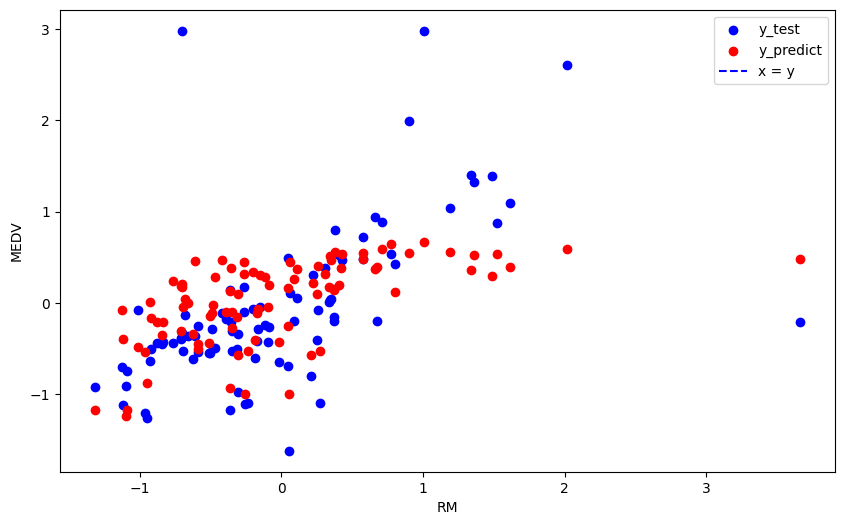

In [ ]:
draw_regression_plot(X_test=X_test['RM'].values, y_test=y_test.values,
                     y_predict=y_pred, xlabel='RM', ylabel='MEDV')

#### LSTAT -> MEDV

In [ ]:
model.train(X_train['LSTAT'].values, y_train.values)

In [ ]:
model.bias

-0.72714820201285

In [ ]:
model.slope

0.022009976588282402

In [ ]:
y_pred = model.predict(X_test['LSTAT'].values)

In [ ]:
r2_score(y_test.values, y_pred)

0.44427364365873356

In [ ]:
mean_squared_error(y_test.values, y_pred, squared=True)

0.3995098907755855

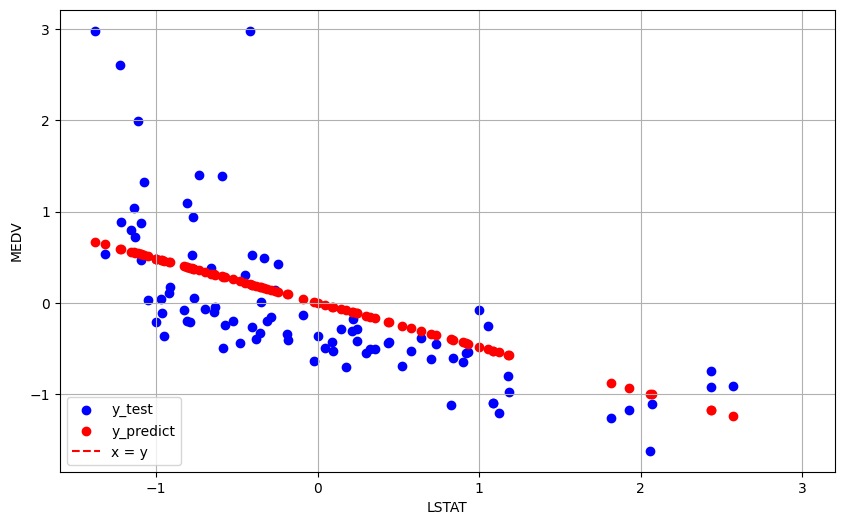

In [ ]:
draw_regression_plot(X_test=X_test['LSTAT'].values, y_test=y_test.values,
                     y_predict=y_pred, xlabel='LSTAT', ylabel='MEDV')

#### PTRATIO -> MEDV

In [ ]:
model.train(X_train['PTRATIO'].values, y_train.values)

In [ ]:
model.bias

-0.4845873537606794

In [ ]:
model.slope

0.002133682679928143

In [ ]:
y_pred = model.predict(X_test['LSTAT'].values)

In [ ]:
r2_score(y_test.values, y_pred)

0.4454465921086421

In [ ]:
mean_squared_error(y_test.values, y_pred, squared=True)

0.3986666619062667

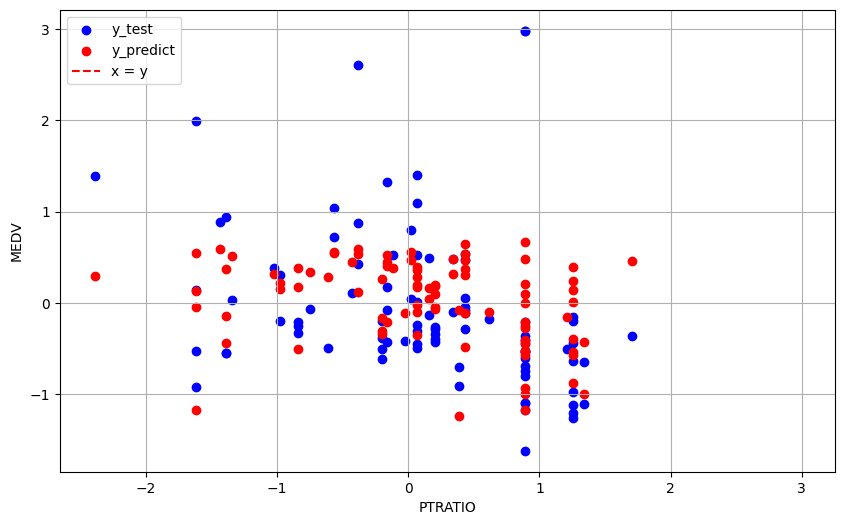

In [ ]:
draw_regression_plot(X_test=X_test['PTRATIO'].values, y_test=y_test.values,
                     y_predict=y_pred, xlabel='PTRATIO', ylabel='MEDV')

### Classification

Before start we add new column named, CMEDV(categorical MEDV) that is 1(luxury) for those more than median and 0(normal) for those less than median

In [13]:
median_MEDV =  standardized['MEDV'].quantile(0.50)
standardized['CMEDV'] = standardized['MEDV'].apply(lambda x : 1 if x > median_MEDV else 0)

In [ ]:
standardized['CMEDV'].astype('category').describe()

count     452
unique      2
top         0
freq      226
Name: CMEDV, dtype: int64

Now, let's divide our new train test columns

In [14]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    standardized.drop(['MEDV', 'CMEDV'], axis=1), standardized['CMEDV'],
    test_size=0.2, random_state=42)

#### Decision Tree
Decision tree is a classification algorithm which is based on the decision rules. It classifies a data point based on the decision rules. The decision rules are based on the features and their values

##### What is Decision Tree Pruning?

Decision tree pruning is a technique used to prevent decision trees from overfitting the training data. Pruning aims to simplify the decision tree by removing parts of it that do not provide significant predictive power, thus improving its ability to generalize to new data.

###### Pre-Pruning

Pre-pruning involves setting a maximum tree depth or minimum number of samples per leaf before the tree is constructed. This can help prevent the tree from becoming too complex and overfitting to the training data.
<br>
pros:
- Can prevent the tree from becoming overly complex and overfitting to the training data
- Can improve the interpretability of the model by reducing the number of nodes
- Can reduce the computational cost of training the model<br>

cons:
- May result in a model with lower accuracy if the tree is pruned too aggressively
- May be less effective at reducing overfitting compared to post-pruning methods


###### Post-Pruning

Post-pruning involves trimming the tree after it has already been constructed. One technique for post-pruning is called reduced error pruning, where nodes are removed from the tree if the accuracy of the model does not improve after the split.
<br>
pros:
- Can improve the accuracy of the model by reducing overfitting
- Can be more effective at reducing overfitting compared to pre-pruning methods
<br>

cons:
- May require additional computational resources to prune the tree after it has already been constructed
- May result in a model with lower interpretability due to the increased number of nodes compared to pre-pruning

##### When it is good choice to use Decision treee

Decision trees are a good choice when the relationship between the predictors and the response is complex and non-linear, when interpretability is important, when dealing with missing values or outliers, when handling large and high-dimensional data, and when the target variable has more than two classes.

##### Implementation

In [ ]:
dtree_clf = DecisionTreeClassifier(random_state=42)
dtree_clf.fit(X_train_clf.values, y_train_clf.values)
y_pred_clf = dtree_clf.predict(X_test_clf.values)

##### Evaluation

In [ ]:
dtree_clf_report = classification_report(y_test_clf, y_pred_clf, output_dict=True)
pd.DataFrame(dtree_clf_report).transpose()

precision    recall  f1-score    support
0              0.923077  0.734694  0.818182  49.000000
1              0.750000  0.928571  0.829787  42.000000
accuracy       0.824176  0.824176  0.824176   0.824176
macro avg      0.836538  0.831633  0.823985  91.000000
weighted avg   0.843195  0.824176  0.823538  91.000000

##### Plot Tree

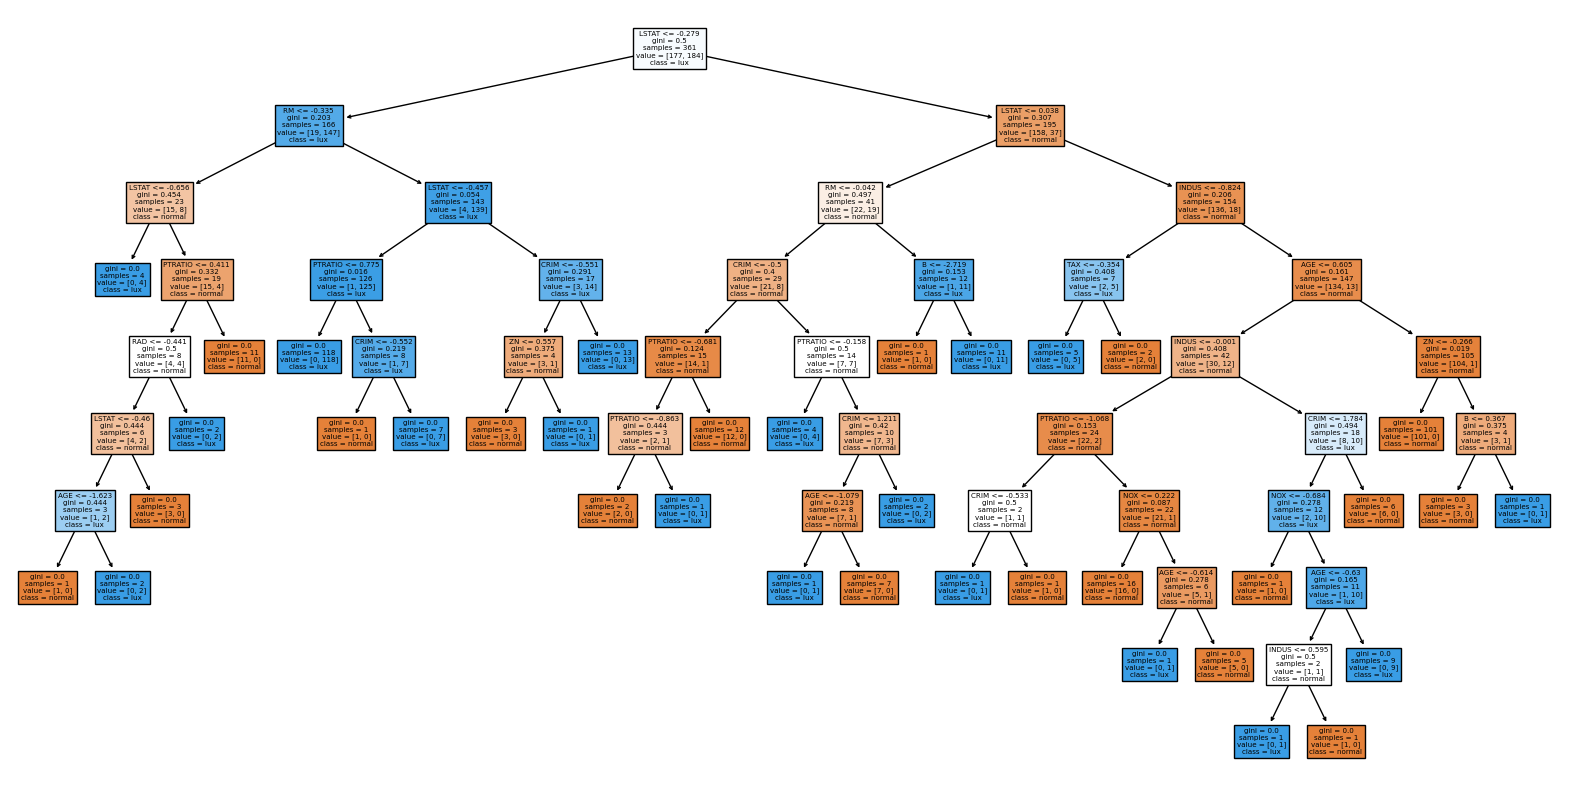

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree_clf, feature_names=X_train_clf.columns,
          class_names=['normal', 'lux'], filled=True)
plt.show()

#### KNN
KNN is a classification algorithm which is based on distance. It classifies a data point based on the majority of the classes of the k nearest neighbors.

##### Major difference between KNN and other classification algorithms

The major difference between KNN and other classification algorithms like SVM (Support Vector Machines), Random Forests, Logistic Regression etc., lies in the fact that KNN does not learn through explicit training, while other algorithms do

##### One Nearest Neighbor

The 1-N-N classifier is one of the oldest methods known. The idea is extremely simple: to classify X find its closest neighbor among the training
points (call it X') and assign to X the label of X.<br>
pros:
- It is conceptually simple
- It does not require learning (term: memory-base).
- It can be used even with few examples.
- It works very well in low dimensions for complex decision surfaces.
<br>

cons:
- For fixed k it is asymptotically suboptimal, but not by much.
- Classification is slow
- It suffers A LOT from the curse-of-dimensionality(difficulties that arise when analyzing or modeling data with many dimensions)

##### Methods for Compared Distance in KNN

- **Minkowski Distance**: It is a metric intended for real-valued vector spaces. We can calculate Minkowski distance only in a normed vector space, which means in a space where distances can be represented as a vector that has a length and the lengths cannot be negative.
$$
(\Sigma_{i=1}^{n}\left | x_i - y_i \right |^p)^\frac{1}{p}
$$
- **Manhattan Distance**: This distance is also known as taxicab distance or city block distance, that is because the way this distance is calculated. The distance between two points is the sum of the absolute differences of their Cartesian coordinates.
- **Euclidean Distance**: This distance is the most widely used one as it is the default metric that SKlearn library of Python uses for K-Nearest Neighbour. It is a measure of the true straight line distance between two points in Euclidean space.
- **Cosine Distance**: This distance metric is used mainly to calculate similarity between two vectors. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in the same direction. It is often used to measure document similarity in text analysis.
$$
cos(\theta) = \frac{\vec{a} . \vec{b}}{\left \| \vec{a} \right \|\left \| \vec{b} \right \|}
$$
- **Jaccard Distance**: The Jaccard coefficient is a similar method of comparison to the Cosine Similarity due to how both methods compare one type of attribute distributed among all data.  The Jaccard approach looks at the two data sets and finds the incident where both values are equal to 1.  So the resulting value reflects how many 1 to 1 matches occur in comparison to the total number of data points. This is also known as the frequency that 1 to 1 match, which is what the Cosine Similarity looks for, how frequent a certain attribute occurs.
$$
J(A, B) = \frac{\left | A \cap B \right |}{\left | A \cup B \right |}
$$

- **Hamming Distance**: Hamming distance is a metric for comparing two binary data strings. While comparing two binary strings of equal length, Hamming distance is the number of bit positions in which the two bits are different. The Hamming distance method looks at the whole data and finds when data points are similar and dissimilar one to one.  The Hamming distance gives the result of how many attributes were different.<br>This is used mostly when you one-hot encode your data and need to find distances between the two binary vectors.

##### Implementation

In [ ]:
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train_clf.values, y_train_clf.values)
y_pred_clf = dtree_clf.predict(X_test_clf.values)

##### Evaluation

In [ ]:
knn_report = classification_report(y_test_clf, y_pred_clf, output_dict=True)
pd.DataFrame(knn_report).transpose()

precision    recall  f1-score    support
0              0.923077  0.734694  0.818182  49.000000
1              0.750000  0.928571  0.829787  42.000000
accuracy       0.824176  0.824176  0.824176   0.824176
macro avg      0.836538  0.831633  0.823985  91.000000
weighted avg   0.843195  0.824176  0.823538  91.000000

#### GridSearchCSV

GridSearchCV acts as a valuable tool for identifying the optimal parameters for a machine learning model. Here’s the process: You provide GridSearchCV with a set of Scoring parameter to experiment with, and it systematically explores each possible combination. For every combination, it evaluates the model’s performance by testing it on various sections of the dataset to gauge its accuracy.

After exhaustively trying out all the combinations, GridSearchCV presents you with the combination of settings that yielded the most favorable outcomes. This streamlines the process of fine-tuning your model, ensuring it operates optimally for your specific task without incurring excessive computational expenses.

##### Decision Tree

- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

- splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_split: The minimum number of samples required to split an internal node.

- min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [ ]:
grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'random_state': [54]}
tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=grid, scoring='accuracy', cv=10)
tree_grid_search.fit(X_train_clf.values, y_train_clf.values)
print(f'Best Accuracy: {tree_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {tree_grid_search.best_params_}')
print(f'Decision Tree Accuracy: {tree_grid_search.score(X_test_clf.values, y_test_clf.values) * 100:5.2f}%')

Best Accuracy: 88.09%
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}
Decision Tree Accuracy: 87.91%


##### KNN

- n_neighbors: Number of neighbors to use by default for kneighbors queries.

- weights: Weight function used in prediction. Possible values:

- uniform: uniform weights. All points in each neighborhood are weighted equally.

- distance: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

- metric: The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

- algorithm: Algorithm used to compute the nearest neighbors.

- leaf_size: Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

- p: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [ ]:
grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 70],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'p': [1, 2]}
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=grid, scoring='accuracy', cv=10)
knn_grid_search.fit(X_train_clf.values, y_train_clf.values)
print(f'Best Accuracy: {knn_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {knn_grid_search.best_params_}')
print(f'KNN Accuracy: {knn_grid_search.score(X_test_clf.values, y_test_clf.values) * 100:5.2f}%')

Best Accuracy: 88.08%
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
KNN Accuracy: 83.52%


#### Overfitting and Underfitting

- Overfitting:
Overfitting is a situation in which the model fits the training data too well. In other words, the model is too complex and it memorizes the training data. As a result, the model performs well on the training data but it performs poorly on the test data.

- Underfitting:
Underfitting is a situation in which the model is too simple and it doesn't fit the training data well. In other words, the model is too simple and it doesn't memorize the training data. As a result, the model performs poorly on both the training data and the test data.

The used models are not overfitting or underfitting. The reason is that the models are not too complex or too simple. This is why both the training accuracy and the test accuracy are almost the same and they are high enough. We can prevent overfitting and underfitting by using validation set and cross-validation. GridSearchCV uses cross-validation to prevent overfitting and underfitting.

#### Ensemble Methods

Ensemble methods are powerful techniques in machine learning that combine multiple models to improve overall performance. These methods leverage the strengths of individual models, often resulting in better predictive performance and robustness compared to single models

##### Bagging and Boosting

- Bagging:
Bagging involves training multiple instances of the same model on different subsets of the training data, obtained by random sampling with replacement (bootstrap samples). The predictions of these models are then averaged (regression) or voted upon (classification).

- Boosting: Boosting sequentially trains models, with each new model focusing on the errors made by the previous ones. The predictions are combined with a weighted vote.



| Aspect                | Bagging                           | Boosting                          |
|-----------------------|-----------------------------------|-----------------------------------|
| Model Building        | Parallel                          | Sequential                        |
| Model Dependency      | Independent                       | Dependent                         |
| Data Sampling         | Bootstrap sampling (with replacement) | Adaptive sampling (weighted instances) |
| Primary Focus         | Reducing variance (overfitting)   | Reducing bias and variance        |
| Aggregation Method    | Averaging or majority vote        | Weighted combination              |
| Typical Use Cases     | High-variance models (e.g., decision trees) | Cases requiring strong models with reduced bias and variance |


##### Random Forest

Random forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

###### Bootstrap Sampling

Bootstrapping involves creating multiple random subsets of the original dataset by sampling with replacement. This means that each subset can contain duplicate instances from the original dataset. The size of each subset is typically the same as the original dataset.<br>
Bootstrapping plays a crucial role in the Random Forest algorithm, and it significantly impacts the performance and characteristics of the model in several ways:
- Diversity of Trees
- Reduction of Overfitting
- mproved Accuracy

###### Importance of Tree Count

If the number of observations is large, but the number of trees is too small, then some observations will be predicted only once or even not at all. If the number of predictors is large but the number of trees is too small, then some features can (theoretically) be missed in all subspaces used

- **Improving Accuracy**: In general, increasing the number of trees tends to improve the accuracy of the Random Forest up to a certain point. With more trees, the model can capture more complex patterns and reduce variance.

- **Stabilizing Predictions**: Adding more trees can also lead to more stable predictions, as the ensemble average or majority vote becomes more robust with a larger number of trees.

- **Computational Cost**: However, there's a trade-off with computational cost. Training and making predictions with a larger number of trees can be more computationally expensive and may not always lead to a significant improvement in accuracy.

Empirical studies and practical experiences often suggest that the optimal number of trees lies between 100 and 500 for most datasets. However, for more complex problems or larger datasets, the optimal number might be higher.

###### When To Use and When not

Use Random Forest when you need a robust, accurate model that can handle high-dimensional data, non-linear relationships, and is tolerant to noise and outliers. Avoid it when real-time predictions, interpretability, or memory efficiency are critical requirements, or when dealing with very high dimensional sparse data where simpler models might be more effective.

###### How does effect *variance*

Random Forests reduce variance through:
- Bootstrap Sampling: Training each tree on different subsets of data.
- Random Feature Selection: Considering only a subset of features at each split.
- Aggregation: Combining the predictions of multiple trees to smooth out noise.
<br>

By reducing variance, Random Forests are able to create models that generalize better to new, unseen data, thus avoiding overfitting and improving overall predictive performance.

###### HyperParameters

parameters explain link -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

###### GridSearchCV

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=grid, cv=10, scoring='accuracy')
rf_grid_search.fit(X_train_clf.values, y_train_clf.values)

print(f'Best Accuracy: {rf_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {rf_grid_search.best_params_}')
print(f'Decision Tree Accuracy: {rf_grid_search.score(X_test_clf.values, y_test_clf.values) * 100:5.2f}%')

Best Accuracy: 90.86%
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
Decision Tree Accuracy: 90.11%


##### XGBoost

###### How it works

- Initialization
> Start with initial predictions, typically the average of the target values for regression or the log odds for binary classification.
- Calculate Residuals
> For each observation, calculate the residuals (errors) from the current model's predictions.
- Fit a New Tree:
> - Train a new decision tree to predict these residuals.
> - The tree is built using a greedy algorithm, where it splits the data to minimize the residuals' variance (or another chosen criterion).
- Update Predictions:
> - The predictions are updated by adding the new tree's predictions, scaled by a learning rate (shrinkage factor).
> - New predictions = Old predictions + learning rate * new tree's predictions
- Repeat:
> Steps 2-4 are repeated for a specified number of iterations (trees) or until the residuals are sufficiently small.

###### Gradient Boosting

Each new model is trained to correct the errors made by the previous models. This is done by minimizing a cost function, using gradient descent to optimize the model.

###### Boosting Tree and Decision Tree

- Decision Tree
A decision tree is a standalone model used for classification and regression tasks. It makes decisions based on a series of binary splits in the data, resulting in a tree-like structure where each leaf node represents a predicted outcome.
- Boosting Tree
Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) to create a strong predictive model. It builds the model in a sequential manner, where each new tree focuses on correcting the errors made by the previous trees.

###### HyperParameter

link -> https://xgboost.readthedocs.io/en/stable/parameter.html

###### GridSearchCV

In [15]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy')

grid_search.fit(X_train_clf.values, y_train_clf.values)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}
Best accuracy found:  0.9030441400304413


##### Support Vector Machine

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

###### RBF Kernel

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_clf.values, y_train_clf.values)

SVC(random_state=42)

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test_clf.values)
print(f"Accuracy: {accuracy_score(y_test_clf.values, y_pred_rbf)}")
print(classification_report(y_test_clf.values, y_pred_rbf))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.82      0.88      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



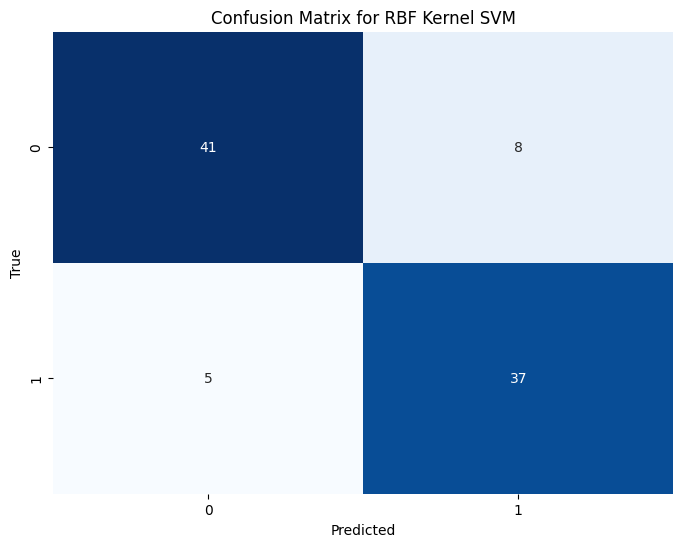

In [ ]:
cm_rbf = confusion_matrix(y_test_clf.values, y_pred_rbf)
plot_confusion_matrix(cm_rbf, "Confusion Matrix for RBF Kernel SVM")

###### Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_clf.values, y_train_clf.values)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_linear = svm_linear.predict(X_test_clf.values)
print(f"Accuracy: {accuracy_score(y_test_clf.values, y_pred_linear)}")
print(classification_report(y_test_clf.values, y_pred_linear))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.82      0.88      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



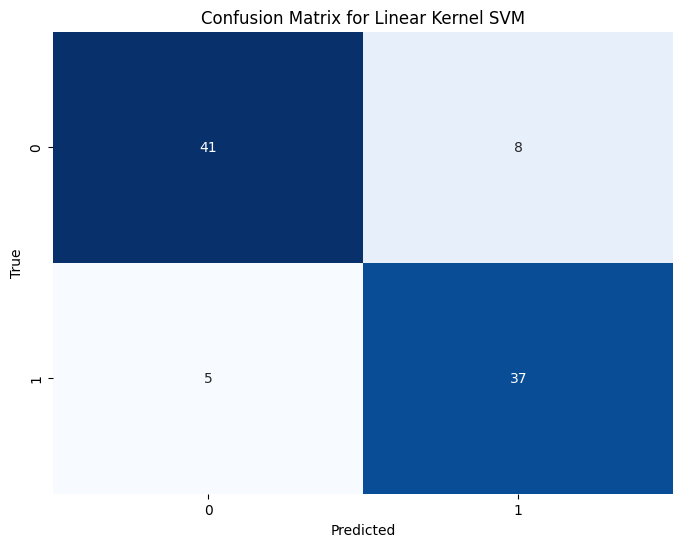

In [ ]:
cm_linear = confusion_matrix(y_test_clf.values, y_pred_linear)
plot_confusion_matrix(cm_linear, "Confusion Matrix for Linear Kernel SVM")

###### GridSearchCV

In [ ]:
grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), grid,
                           refit=True,
                           cv=10)
svm_grid_search.fit(X_train_clf.values, y_train_clf.values)
print(f"Best Parameters: {svm_grid_search.best_params_}")

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Use when you can afford the computational cost and need an exhaustive search over a well-defined grid of parameters.

###### Random Search

In [ ]:
param_dist = {
    'C': expon(scale=100),
    'gamma': expon(scale=0.1),
    'kernel': ['rbf', 'linear']
}

svm_random_search = RandomizedSearchCV(SVC(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   refit=True,)
svm_random_search.fit(X_train_clf.values, y_train_clf.values)
print(f"Best Parameters: {svm_random_search.best_params_}")

Best Parameters: {'C': 3.707589875069221, 'gamma': 0.15719133343963326, 'kernel': 'rbf'}


Use when you have many hyperparameters to tune, want a faster solution, and are okay with a probabilistic approach that might miss the absolute best but often finds very good solutions.
<br>
RandomizedSearchCV is often preferred for its efficiency and ability to handle large and complex hyperparameter spaces effectively.

## Model Evaluation

- **Accuracy** measures the proportion of correctly classified cases from the total number of objects in the dataset. To compute the metric, divide the number of correct predictions by the total number of predictions made by the model.
$$Accuracy = \frac{correct\hspace{0.3em}predictions}{all\hspace{0.3em}predictions}$$
- **Precision**:
$$TP → predict \hspace{0.2em} label = true \hspace{0.2em} label \hspace{0.5em} and \hspace{0.5em} true \hspace{0.2em} label = positive$$
$$FP → predict \hspace{0.2em} label \neq true \hspace{0.2em} label \hspace{0.5em} and \hspace{0.5em} true \hspace{0.2em} label = negative$$
$$FN → predict \hspace{0.2em} label \neq true \hspace{0.2em} label \hspace{0.5em} and \hspace{0.5em} true \hspace{0.2em} label = positive$$
$$TN → predict \hspace{0.2em} label = true \hspace{0.2em} label \hspace{0.5em} and \hspace{0.5em} true \hspace{0.2em} label = negative$$
    - binary classification:
$$Precision = \frac{TP}{TP + FP}$$
    - multi-class classification:To calculate the precision, we divide the number of correct predictions of each Class by the total number of that Class predictions (true and false).
$$Precission_{class} = \frac{TP_{class}}{TP_{class} + FP_{class}}$$
- **Recall**:
    - binary classification:
$$Recall = \frac{TP}{TP + FN}$$
    - multi-class classification: To calculate the recall, we divide the number of correct predictions of Class “A” by the total number of Class “A” objects in the dataset (both identified and not)
$$Recall_{class} = \frac{TP_{class}}{TP_{class} + FN_{class}}$$
- **F1 Score**:
    - binary classification:
$$F1\hspace{0.2em}Score = 2 \times \frac{Precission × Recall}{Precission + Recall}$$
    - multi-class classification:
         - macro-avg:
$$Precision_{macro avg} = \frac{Precission_{class_1} + … + Precission_{class_N}}{N}$$
$$Recall_{macro avg} = \frac{Recall_{class_1} + … + Recall_{class_N}}{N}$$
$$F1_{macro avg} = 2 \times \frac{Precission_{macro avg} + Recall_{macro avg}}{Precission_{macro avg} × Recall_{macro avg}}$$
         - micro-avg:
$$Precision_{micro avg} = \frac{TP_{class_1} + … + TP_{class_N}}{TP_{class_1} FP_{class_1} + … + FP_{class_N} + TP_{class_N}}$$
$$Recall_{micro avg} = \frac{TP_{class_1} + … + TP_{class_N}}{TP_{class_1} FN_{class_1} + … + FN_{class_N} + TP_{class_N}}$$
$$F1_{micro avg} = 2 \times \frac{Precission_{micro avg} + Recall_{micro avg}}{Precission_{micro avg} × Recall_{micro avg}}$$
         - wieghted: This approach takes into account the balance of classes. You weigh each class based on its representation in the dataset. Then, you compute precision and recall as a weighted average of the precision and recall in individual classes. Simply put, it would work like macro-averaging, but instead of dividing precision and recall by the number of classes, you give each class a fair representation based on the proportion it takes in the dataset.